## Data Load and Overview

In [2]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.style.use('fivethirtyeight')
sns.set(style="whitegrid")


In [5]:
# Reading the data from csv
csv_path = 'loan.csv'
loan_data_df = pd.read_csv(csv_path)

In [6]:
# Set all coloumns visible
pd.set_option('display.max_columns', None)

In [7]:
loan_data_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [8]:
# check rows and columns
loan_data_df.shape

(39717, 111)

## <font color=magenta>Data cleaning</font>

### 1: Remove Columns With Null values

In [9]:
loan_data_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [10]:
loan_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [11]:
# Percentage of null values
null_perc = round((loan_data_df.isnull().sum()/len(loan_data_df)) * 100,2)

In [12]:
# Percentage of null values for each columns
null_perc[null_perc > 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.59
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

#### Several columns contain null values. To maintain data quality, we'll remove columns with a null value percentage exceeding 30%.


In [13]:
# Removing columns with more than 30% null values
loan_data_df.drop(null_perc[ null_perc >= 30].index, axis=1, inplace=True)

In [14]:
# Rechecking percentage of null values
loan_data_df.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [15]:
loan_data_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

          purpose                 title zip_code addr_state    dti  \
0     credit_card              Computer    860xx         AZ  27.65   
1             car                  bike    309xx         GA   1.00   
2  small_business  real estate business    606xx         IL   8.72   
3           other              personel    917xx         CA  20.00   
4           other              Personal    972xx         OR  17.94   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0            0           Jan-85               1         3        0      13648   
1            0           Apr-99               5         3        0       1687   
2            0           Nov-01               2         2        0       2956   
3            0           Feb-96               1        10        0       5598   
4            0           Jan-96               0        15        0      27783   

  revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
0     83.70%          9                   f       0.00           0.00   
1      9.40%          4                   f       0.00           0.00   
2     98.50%         10                   f       0.00           0.00   
3        21%         37                   f       0.00           0.00   
4     53.90%         38                   f     524.06         524.06   

    total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0   5863.155187          5833.84          5000.00         863.16   
1   1008.710000          1008.71           456.46         435.17   
2   3005.666844          3005.67          2400.00         605.67   
3  12231.890000         12231.89         10000.00        2214.92   
4   3513.330000          3513.33          2475.94        1037.39   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00        0.00                     0.00       Jan-15   
1                0.00      117.08                     1.11       Apr-13   
2                0.00        0.00                     0.00       Jun-14   
3               16.97        0.00                     0.00       Jan-15   
4                0.00        0.00                     0.00       May-16   

   last_p

### 2: Remove Unique Value Columns

In [16]:
#Finding columns with unique values
loan_data_df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [17]:
# Getting the list of columns with only 1 value i.e unique value column
unique_counts = loan_data_df.nunique().sort_values()
columns_with_unique_value_1 = unique_counts[unique_counts == 1].index.tolist()
columns_with_unique_value_1

['tax_liens',
 'delinq_amnt',
 'chargeoff_within_12_mths',
 'acc_now_delinq',
 'application_type',
 'policy_code',
 'collections_12_mths_ex_med',
 'initial_list_status',
 'pymnt_plan']

#### We've identified columns containing only a single unique value. These columns offer no analytical value and will be removed.

In [18]:
#drop unique value columns
loan_data_df.drop(columns_with_unique_value_1,axis=1,inplace=True)

In [19]:
#verify if unique value columns are dropped
loan_data_df.nunique().sort_values(ascending=False)

id                         39717
url                        39717
member_id                  39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
revol_util                  1089
funded_amnt                 1041
loan_amnt                    885
zip_code                     823
earliest_cr_line             526
int_rate                     371
last_credit_pull_d           106
last_pymnt_d                 101
total_acc                     82
issue_d                       55
addr_state

### 3: Remove Non Contributing Columns

#### we can safely remove the columns such as `id`, `member_id`, `url`, `title`, `emp_title`, `zip_code`, `last_credit_pull_d`


In [20]:
# Removing  `member_id`, `url`, `title`, `emp_title`, `zip_code`, `last_credit_pull_d`
loan_data_df.drop([ "member_id", "url", "title", "emp_title", "zip_code"], axis = 1, inplace = True)

#### Our goal is to pinpoint strong indicators of potential loan defaults. This information is crucial for the company's portfolio and risk management strategies. Since we're focusing on predicting future defaults, metadata about borrowers who have already taken loans isn't relevant. Therefore, we'll remove those columns.

In [21]:
#removing borrowers meta data columns
loan_data_df.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_credit_pull_d', 'last_pymnt_d', 'out_prncp','out_prncp'],axis=1,inplace=True)

#### `out_prncp_inv` , `total_pymnt_inv` are useful for investors but not contributing to the loan defaulting analysis. So removing them.


In [22]:
# Removing columns `out_prncp_inv` , `total_pymnt_inv`
loan_data_df.drop(["out_prncp_inv","total_pymnt_inv"], axis = 1, inplace = True)

####  The column `funded_amnt` represents the requested loan amount, while `funded_amnt_inv` indicates the actual amount funded. Since our analysis focuses on the actual funded amounts, we can safely remove the `funded_amnt` column to avoid redundancy.


In [23]:
# Removing `funded_amnt`
loan_data_df.drop(["funded_amnt"], axis = 1, inplace = True)

#### Finding null values percentage in remaining columns

In [24]:
# Find columns which has null value percentage greater than 0
null_perc = round((loan_data_df.isnull().sum()/len(loan_data_df)) * 100,2)
null_perc[null_perc > 0]

emp_length              2.71
revol_util              0.13
pub_rec_bankruptcies    1.75
dtype: float64

#### Removing null values rows in these columns since we can't replace them with mean or median values.

In [25]:
# Drop null rows
null_columns_greater_than_zero = null_perc[null_perc > 0].index.tolist()
loan_data_df.dropna(subset = null_columns_greater_than_zero,inplace=True)


In [26]:
# Verify if any column has null values
null_value_perc = round((loan_data_df.isnull().sum()/len(loan_data_df)) * 100,2)
null_value_perc[null_value_perc > 0]


Series([], dtype: float64)

#### Get loan_status possible values

In [27]:
loan_data_df.loan_status.value_counts()

loan_status
Fully Paid     31534
Charged Off     5266
Current         1098
Name: count, dtype: int64

#### To analyze loan default patterns, we need to focus on loans that have reached a conclusion (either paid off or defaulted). Therefore, we'll remove loans with a 'Current' status, as they are still ongoing.

In [28]:
#removing the records with 'Current' loan status and verify if removed
loan_data_df = loan_data_df[loan_data_df.loan_status != 'Current']
loan_data_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

## <font color=magenta>Standardizing the data </font>

### 1:  List and Verify text based columns for any potential issues

In [29]:
# List text based columns
text_columns = [col for col in loan_data_df.columns if loan_data_df[col].dtype == 'object']
text_columns

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'addr_state',
 'earliest_cr_line',
 'revol_util']

In [30]:
loan_data_df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [31]:
loan_data_df['term'] = loan_data_df.term.str.strip()

In [32]:
loan_data_df.term.unique()

array(['36 months', '60 months'], dtype=object)

In [33]:
loan_data_df.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [34]:
loan_data_df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [35]:
loan_data_df.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [36]:
loan_data_df.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [37]:
loan_data_df.revol_util.unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [38]:
loan_data_df.sub_grade.unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [39]:
loan_data_df.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [40]:
loan_data_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### 2: Data type conversion

In [41]:
# List all columns data type
loan_data_df.dtypes

id                        int64
loan_amnt                 int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: object

#### The columns 'revol_util' and 'int_rate' are currently represented as objects, but for numerical analysis, they should be converted to float.

In [42]:
# Verify if int_rate converted to float
loan_data_df.int_rate

0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39562    10.28%
39573    10.59%
39623    12.49%
39666    11.22%
39680    11.86%
Name: int_rate, Length: 36800, dtype: object

In [43]:
# Verify if revol_util converted to float
loan_data_df.revol_util

0        83.70%
1         9.40%
2        98.50%
3           21%
5        28.30%
          ...  
39562    68.70%
39573       79%
39623    62.90%
39666    34.30%
39680    70.90%
Name: revol_util, Length: 36800, dtype: object

#### The columns `revol_util` and `int_rate` currently contain '%' characters, hindering numerical analysis. We wil remove these characters and convert the columns to float for proper handling.


In [44]:
# fix int_rate column type to float
non_perc_char_int_rate = loan_data_df.int_rate.str.strip('%')
loan_data_df.int_rate = non_perc_char_int_rate.astype(float)
loan_data_df.int_rate.dtype

dtype('float64')

In [45]:
# fix revol_util column type to float
non_perc_char_revolt_rate = loan_data_df.revol_util.str.strip('%')
loan_data_df.revol_util = non_perc_char_revolt_rate.astype(float)
loan_data_df.revol_util.dtype

dtype('float64')

#### Several columns containing date values are currently represented as objects. We'll convert these to the appropriate date data type for proper chronological analysis.

In [46]:
# fix issue_d column type to date
loan_data_df['issue_d'] = pd.to_datetime(loan_data_df.issue_d, format='%b-%y')
loan_data_df['issue_d'] = loan_data_df['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2023 else x)

In [47]:
# fix earliest_cr_line column type to date
loan_data_df['earliest_cr_line'] = pd.to_datetime(loan_data_df.earliest_cr_line, format='%b-%y')
loan_data_df['earliest_cr_line'] = loan_data_df['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2023 else x)

In [48]:
# verify if issue_d column data type converted to date
loan_data_df.issue_d

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39562   2007-11-01
39573   2007-11-01
39623   2007-10-01
39666   2007-08-01
39680   2007-08-01
Name: issue_d, Length: 36800, dtype: datetime64[ns]

In [49]:
# verify if earliest_cr_line column data type converted to date
loan_data_df.earliest_cr_line

0       1985-01-01
1       1999-04-01
2       2001-11-01
3       1996-02-01
5       2004-11-01
           ...    
39562   2000-03-01
39573   1989-02-01
39623   1997-08-01
39666   1992-11-01
39680   2000-07-01
Name: earliest_cr_line, Length: 36800, dtype: datetime64[ns]

#### While the date columns currently hold single values, extracting the year, month, and day components will provide more granular temporal information, potentially revealing valuable insights for our analysis.

In [50]:
# Extracting the year, month, and date from issue_d column
loan_data_df['issue_d_year'] = loan_data_df.issue_d.dt.year
loan_data_df['issue_d_month'] = loan_data_df.issue_d.dt.month
loan_data_df['issue_d_dayofweek'] = loan_data_df.issue_d.dt.day_of_week

In [51]:
# Extracting the year, month, and date from earliest_cr_line column
loan_data_df['earliest_cr_year'] = loan_data_df.earliest_cr_line.dt.year
loan_data_df['earliest_cr_month'] = loan_data_df.earliest_cr_line.dt.month
loan_data_df['earliest_cr_dayofweek'] = loan_data_df.earliest_cr_line.dt.day_of_week

In [52]:
loan_data_df.head()

id  loan_amnt  funded_amnt_inv       term  int_rate  installment  \
0  1077501       5000           4975.0  36 months     10.65       162.87   
1  1077430       2500           2500.0  60 months     15.27        59.83   
2  1077175       2400           2400.0  36 months     15.96        84.33   
3  1076863      10000          10000.0  36 months     13.49       339.31   
5  1075269       5000           5000.0  36 months      7.90       156.46   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B        B2  10+ years           RENT     24000.0            Verified   
1     C        C4   < 1 year           RENT     30000.0     Source Verified   
2     C        C5  10+ years           RENT     12252.0        Not Verified   
3     C        C1  10+ years           RENT     49200.0     Source Verified   
5     A        A4    3 years           RENT     36000.0     Source Verified   

     issue_d  loan_status         purpose addr_state    dti  delinq_2yrs  \
0 2011-12-01   Fully Paid     credit_card         AZ  27.65            0   
1 2011-12-01  Charged Off             car         GA   1.00            0   
2 2011-12-01   Fully Paid  small_business         IL   8.72            0   
3 2011-12-01   Fully Paid           other         CA  20.00            0   
5 2011-12-01   Fully Paid         wedding         AZ  11.20            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0       1985-01-01               1         3        0      13648        83.7   
1       1999-04-01               5         3        0       1687         9.4   
2       2001-11-01               2         2        0       2956        98.5   
3       1996-02-01               1        10        0       5598        21.0   
5       2004-11-01               3         9        0       7963        28.3   

   total_acc   total_pymnt  last_pymnt_amnt  pub_rec_bankruptcies  \
0          9   5863.155187           171.62                   0.0   
1          4   1008.710000           119.66                   0.0   
2         10   3005.666844           649.91                   0.0   
3         37  12231.890000           357.48                   0.0   
5         12   5632.210000           161.03                   0.0   

   issue_d_year  issue_d_month  issue_d_dayofweek  earliest_cr_year  \
0          2011             12                  3              1985   
1          2011             12                  3              1999   
2          2011             12                  3              2001   
3          2011             12                  3              1996   
5          2011             12                  3              2004   

   earliest_cr_month  earliest_cr_dayofweek  
0                  1                      1  
1                  4                      3  
2                 11                      3  
3                  2                      3  
5                 11                      0

#### To understand the relationship between requested and approved loan amounts, we'll calculate the ratio of 'funded_amnt_inv' (approved amount) to 'loan_amnt' (requested amount).

In [53]:
loan_data_df['approved_loan_amnt_percentage'] = round((loan_data_df.funded_amnt_inv/loan_data_df.loan_amnt)*100,2)

In [54]:
loan_data_df.head()

id  loan_amnt  funded_amnt_inv       term  int_rate  installment  \
0  1077501       5000           4975.0  36 months     10.65       162.87   
1  1077430       2500           2500.0  60 months     15.27        59.83   
2  1077175       2400           2400.0  36 months     15.96        84.33   
3  1076863      10000          10000.0  36 months     13.49       339.31   
5  1075269       5000           5000.0  36 months      7.90       156.46   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B        B2  10+ years           RENT     24000.0            Verified   
1     C        C4   < 1 year           RENT     30000.0     Source Verified   
2     C        C5  10+ years           RENT     12252.0        Not Verified   
3     C        C1  10+ years           RENT     49200.0     Source Verified   
5     A        A4    3 years           RENT     36000.0     Source Verified   

     issue_d  loan_status         purpose addr_state    dti  delinq_2yrs  \
0 2011-12-01   Fully Paid     credit_card         AZ  27.65            0   
1 2011-12-01  Charged Off             car         GA   1.00            0   
2 2011-12-01   Fully Paid  small_business         IL   8.72            0   
3 2011-12-01   Fully Paid           other         CA  20.00            0   
5 2011-12-01   Fully Paid         wedding         AZ  11.20            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0       1985-01-01               1         3        0      13648        83.7   
1       1999-04-01               5         3        0       1687         9.4   
2       2001-11-01               2         2        0       2956        98.5   
3       1996-02-01               1        10        0       5598        21.0   
5       2004-11-01               3         9        0       7963        28.3   

   total_acc   total_pymnt  last_pymnt_amnt  pub_rec_bankruptcies  \
0          9   5863.155187           171.62                   0.0   
1          4   1008.710000           119.66                   0.0   
2         10   3005.666844           649.91                   0.0   
3         37  12231.890000           357.48                   0.0   
5         12   5632.210000           161.03                   0.0   

   issue_d_year  issue_d_month  issue_d_dayofweek  earliest_cr_year  \
0          2011             12                  3              1985   
1          2011             12                  3              1999   
2          2011             12                  3              2001   
3          2011             12                  3              1996   
5          2011             12                  3              2004   

   earliest_cr_month  earliest_cr_dayofweek  approved_loan_amnt_percentage  
0                  1                      1                           99.5  
1                  4                      3                          100.0  
2                 11                      3                          100.0  
3                  2                      3                          100.0  
5                 11                      0                          100.0

#### Reviewing the data types of all columns to ensure they are now appropriate for our analysis

In [55]:
loan_data_df.dtypes

id                                        int64
loan_amnt                                 int64
funded_amnt_inv                         float64
term                                     object
int_rate                                float64
installment                             float64
grade                                    object
sub_grade                                object
emp_length                               object
home_ownership                           object
annual_inc                              float64
verification_status                      object
issue_d                          datetime64[ns]
loan_status                              object
purpose                                  object
addr_state                               object
dti                                     float64
delinq_2yrs                               int64
earliest_cr_line                 datetime64[ns]
inq_last_6mths                            int64
open_acc                                

***

##  <font color=magenta>Univariate Analysis</font>

#### Define a class which will have methods to construct graph

In [56]:
class GraphMaker:

    def __init__(self, df):
        self.df = df

    # Function to render bar plots
    def renderBarPlot(self, col_name, x_label, y_label,rotation):

        col_value_counts = self.df[col_name].value_counts()
        col_index = col_value_counts.index
        bar_lot = sns.barplot(x=col_index, y=col_value_counts)
        bar_lot.set(xlabel=x_label)
        bar_lot.set(ylabel=y_label)
        plt.xticks(rotation=rotation)
        plt.show()

    # Function to render box plots
    def renderBoxPlot(self, col_name, y_label):
        box_plot = sns.boxplot(data=self.df[col_name])
        box_plot.set(ylabel=y_label)
        plt.show()


In [57]:
#create object of GraphMaker class
gm = GraphMaker(loan_data_df)

### <font color=orange>1. Analysing loan amount column</font>

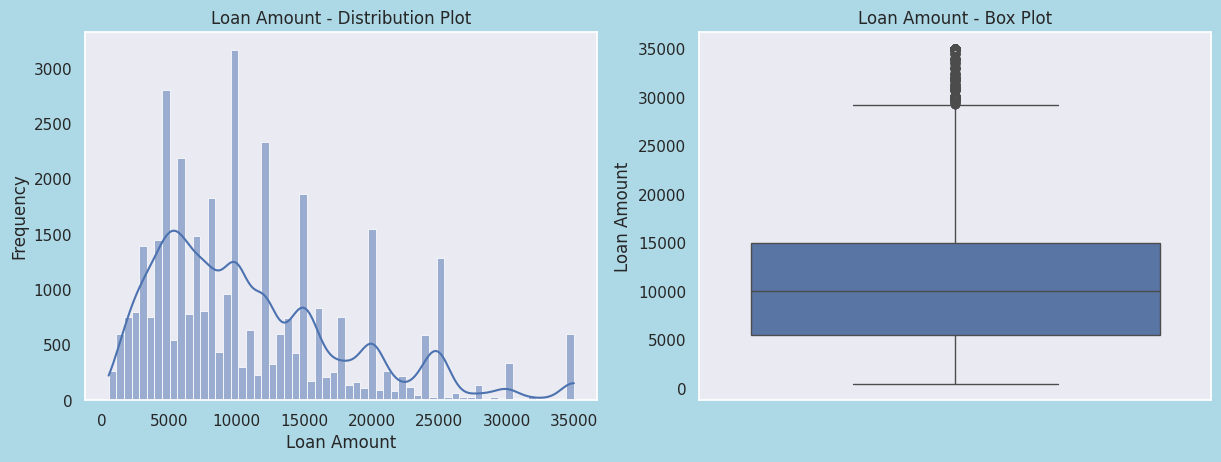

In [58]:
plt.figure(figsize=(20,10),facecolor='lightblue')
sns.set_style("dark")

plt.subplot(2, 3, 1)
ax = sns.histplot(loan_data_df['loan_amnt'], kde=True)
ax.set_title('Loan Amount - Distribution Plot')
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Frequency')

plt.subplot(2, 3, 2)
box_plot = sns.boxplot(data=loan_data_df['loan_amnt'])
box_plot.set_title('Loan Amount - Box Plot')
box_plot.set(ylabel='Loan Amount')
plt.show()


In [59]:
loan_data_df.loan_amnt.describe()

count    36800.000000
mean     11149.540761
std       7369.855703
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [60]:
value_counts = loan_data_df.loan_amnt.value_counts()
(value_counts / len(loan_data_df)) * 100

loan_amnt
10000    7.255435
12000    5.918478
5000     5.190217
6000     4.907609
15000    4.804348
           ...   
3925     0.002717
11375    0.002717
18325    0.002717
9650     0.002717
23575    0.002717
Name: count, Length: 855, dtype: float64

### Findings

- The data reveals a clear preference for loan amounts around 10,000, with this being the most common choice. Significantly fewer borrowers opt for either the minimum (500) or maximum (35,000) loan amounts available.

- The majority of borrowers tend towards moderate loan sizes, as evidenced by the median loan amount of 10,000. This preference suggests a balance between borrowing needs and repayment capacity for most individuals.

- The mean loan amount (11,149) is slightly higher than the median, indicating a right-skewed distribution. This suggests that while most loans are concentrated around the median, there are a smaller number of larger loans that pull the average upwards.

***

#### <font color=orange> 2. Analysing loan terms </font>

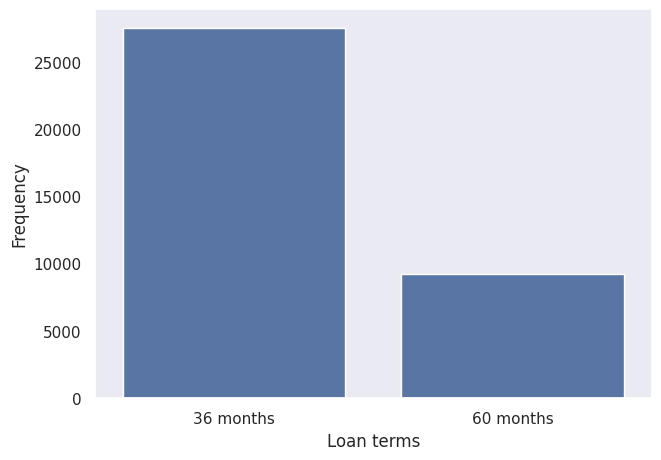

In [61]:
gm.renderBarPlot("term","Loan terms",'Frequency',0)

In [62]:
value_counts = loan_data_df.term.value_counts()
(value_counts / len(loan_data_df)) * 100

term
36 months    74.853261
60 months    25.146739
Name: count, dtype: float64

#### Findings

- Borrowers overwhelmingly favor shorter loan terms (36 months), likely due to a desire to pay off their debts more quickly and potentially pay less interest overall.

- The preference for shorter terms may also reflect risk aversion or financial constraints, as borrowers might feel more confident in their ability to manage shorter repayment periods.

- The significant difference in term preferences could influence the interest rates offered for different terms and may even correlate with default rates, as longer terms might be associated with higher risk.

***

#### <font color=orange> 3. Analysing approved_loan_amnt_perctange column </font>

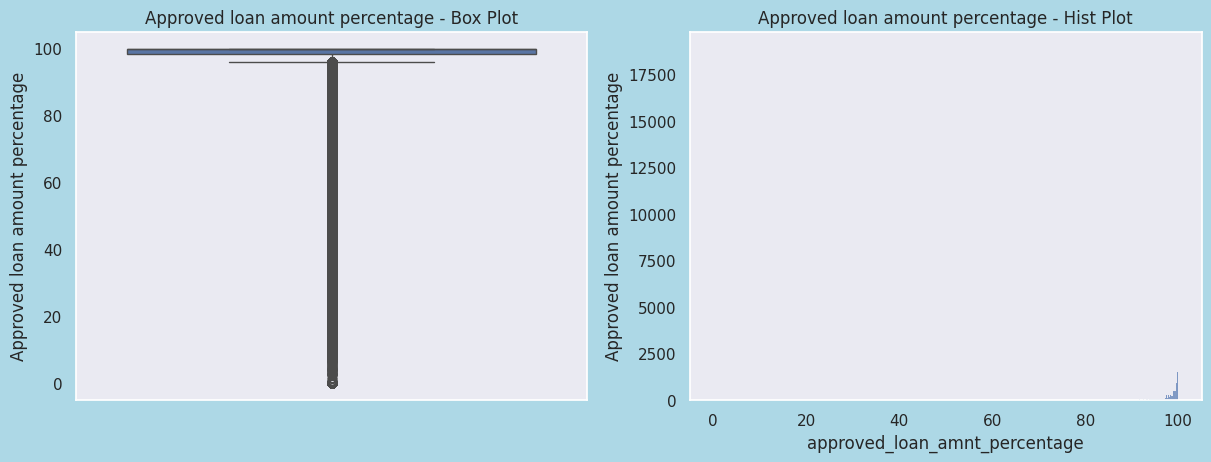

In [63]:
plt.figure(figsize=(20,10),facecolor='lightblue')
sns.set_style("dark")

plt.subplot(2, 3, 1)
box_plot = sns.boxplot(data=loan_data_df['approved_loan_amnt_percentage'])
box_plot.set_title('Approved loan amount percentage - Box Plot')
box_plot.set(ylabel='Approved loan amount percentage')

plt.subplot(2, 3, 2)
histPlot = sns.histplot(data=loan_data_df.approved_loan_amnt_percentage)
histPlot.set_title('Approved loan amount percentage - Hist Plot')
histPlot.set(ylabel='Approved loan amount percentage')
plt.show()

In [64]:
loan_data_df.approved_loan_amnt_percentage.describe()

count    36800.000000
mean        94.824049
std         15.016762
min          0.000000
25%         98.410000
50%         99.970000
75%        100.000000
max        100.000000
Name: approved_loan_amnt_percentage, dtype: float64

#### Findings

- The data shows that most loan applications (over 75%) are approved for the full requested amount, indicating a high degree of lender confidence in borrowers' ability to repay.
- While the high approval rate is positive, it might also signal a potential risk of increased defaults if borrowers overestimate their repayment capacity or if lending criteria are too lenient.

***

#### <font color=orange> 4. Analysing Interest rate </font>

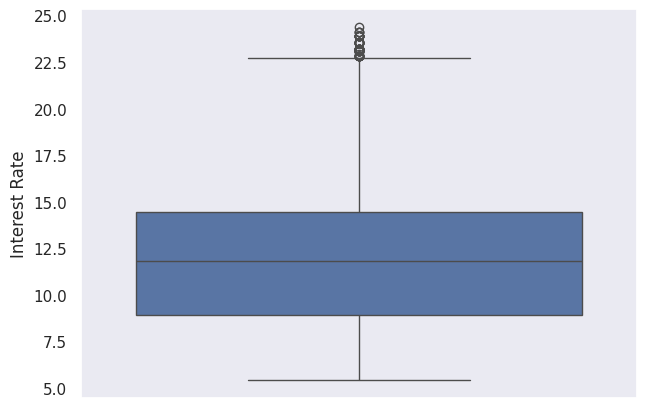

In [65]:
gm.renderBoxPlot("int_rate",'Interest Rate')

In [66]:
loan_data_df.int_rate.describe()

count    36800.000000
mean        11.983745
std          3.701182
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

#### Findings

- The majority of loans have interest rates concentrated between 9% and 14%, suggesting a relatively standard and competitive lending environment for most borrowers. This aligns with the mean interest rate of 11.98%.
- The boxplot and descriptive statistics show outliers with interest rates exceeding 22%, indicating that a small portion of borrowers face significantly higher borrowing costs. This could be due to various factors such as lower credit scores, riskier loan types, or specific loan terms.

***

#### <font color=orange> 5. Analysing Installments - Monthly payment done by the borrowers to lenders </font>

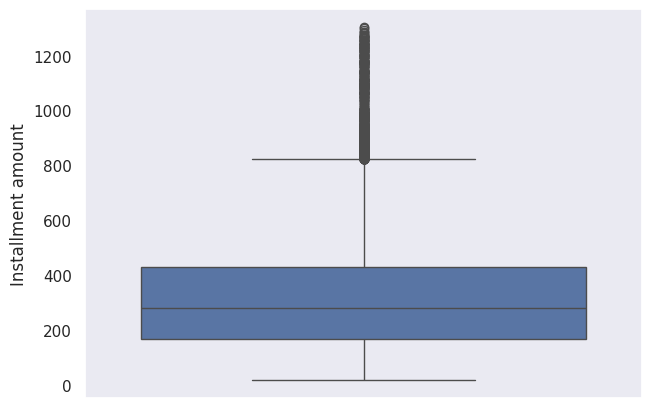

In [67]:
gm.renderBoxPlot('installment','Installment amount')

In [68]:
loan_data_df.installment.describe()

count    36800.000000
mean       324.906537
std        208.891979
min         16.080000
25%        167.730000
50%        280.110000
75%        429.365000
max       1305.190000
Name: installment, dtype: float64

#### Findings

- The majority of borrowers have monthly installment payments between 167.73 and 429.36, suggesting that these amounts are generally manageable for most individuals.

-  A small portion of borrowers face significantly higher monthly payments (up to 1305), likely due to larger loan amounts, shorter terms, or higher interest rates. These individuals could be at higher risk of default and require closer scrutiny.

- The distribution of monthly installments is skewed to the right, with most borrowers clustered around lower payment amounts and a smaller number of borrowers having much higher payments. This highlights the need for a nuanced understanding of borrowers' diverse financial situations.

***

#### <font color=orange> 6. Analysing grade column </font>

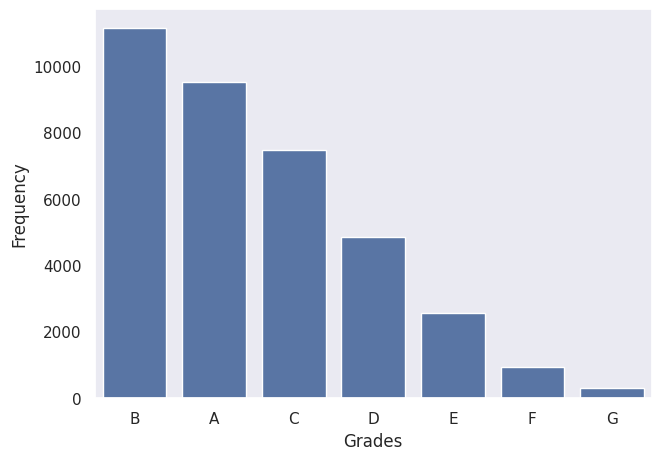

In [69]:
gm.renderBarPlot("grade","Grades",'Frequency',0)

In [70]:
value_counts = loan_data_df.grade.value_counts()
(value_counts / len(loan_data_df)) * 100

grade
B    30.296196
A    25.864130
C    20.309783
D    13.184783
E     6.994565
F     2.551630
G     0.798913
Name: count, dtype: float64

#### Findings

- The data indicates that 56% of borrowers fall within the top two credit grades (A and B). This is a positive sign for the lending platform, as it suggests a significant portion of borrowers are considered low-risk and more likely to repay their loans on time. This aligns with the finding that a substantial share of borrowers are creditworthy.

- The distribution of grades shows a decreasing trend, with fewer borrowers in each subsequent grade. This indicates that borrowers with lower grades (C, D, E, F, and G) are considered higher-risk and may be more likely to default on their loans. This aligns with the general understanding that lower credit grades are associated with higher risk.

- While the majority of borrowers are in the higher grades, the presence of borrowers across all grades suggests a diversified portfolio for the lending platform. This can help mitigate risk by spreading investments across different risk levels. This aligns with the observation that there is a substantial share of creditworthy borrowers, but also a distribution across different risk levels.

***

#### <font color=orange> 7. Analysing employment experience </font>

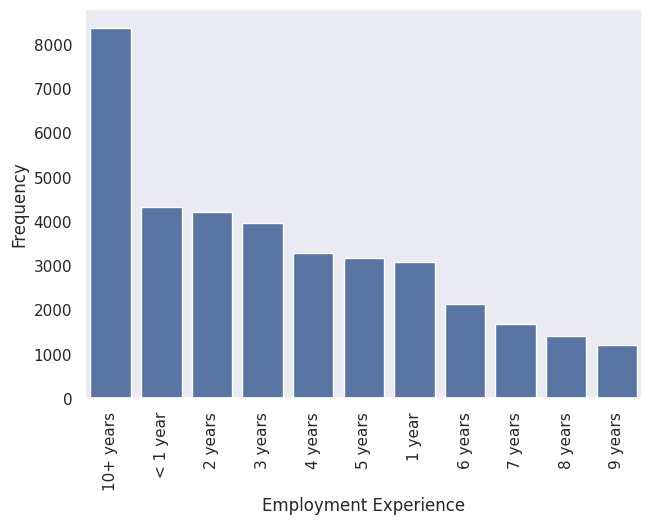

In [71]:
gm.renderBarPlot("emp_length","Employment Experience",'Frequency',90)

In [72]:
value_counts = loan_data_df.emp_length.value_counts()
(value_counts / len(loan_data_df)) * 100

emp_length
10+ years    22.739130
< 1 year     11.763587
2 years      11.418478
3 years      10.725543
4 years       8.940217
5 years       8.578804
1 year        8.345109
6 years       5.796196
7 years       4.581522
8 years       3.826087
9 years       3.285326
Name: count, dtype: float64

#### Findings

-   The graph shows most borrowers have a lot of work experience (10+ years), which is good because they are probably stable in their jobs and can pay back the loan.

-   A good number of borrowers have very little work experience (less than 1 year). This could be a bit risky for the lender because new workers might lose their jobs more easily and have trouble paying back the loan.

- The graph shows a mix of experienced and less experienced borrowers. This is good for the lender to have different types of borrowers, but they need to be careful about the risk of those with less experience.

***

#### <font color=orange> 8. Analysing home ownership data </font>

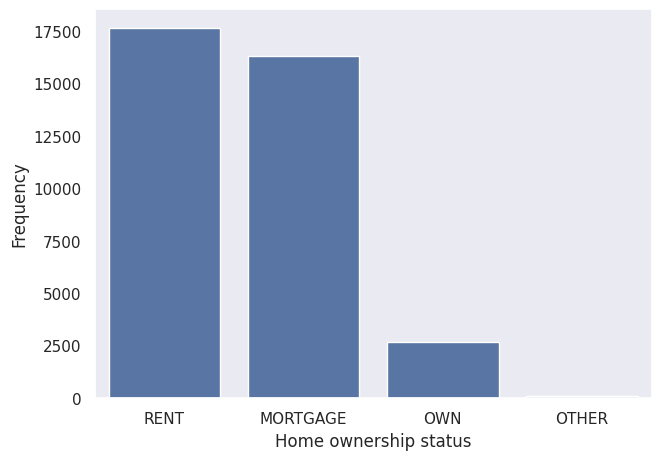

In [73]:
gm.renderBarPlot("home_ownership","Home ownership status",'Frequency',0)

In [74]:
value_counts = loan_data_df.home_ownership.value_counts()
(value_counts / len(loan_data_df)) * 100

home_ownership
RENT        48.008152
MORTGAGE    44.385870
OWN          7.345109
OTHER        0.260870
Name: count, dtype: float64

#### Findings

- The bar chart clearly shows that most borrowers either rent (48%) or have a mortgage (44%). This suggests that a large portion of borrowers may have ongoing housing expenses.

- The "OWN" category represents a small fraction of borrowers (7%), indicating that only a minority have fully paid off their homes. This suggests that most borrowers are still in the process of building equity.


***

#### <font color=orange> 9. Analysing Annual Income - Income declared by the borrower during loan processing </font>

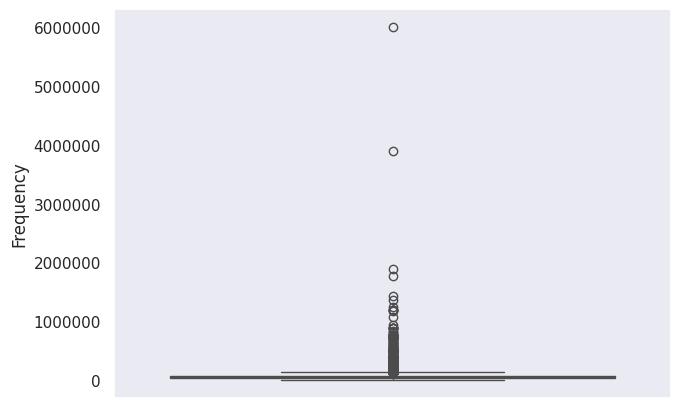

In [75]:
plt.ticklabel_format(style='plain', axis='y')
gm.renderBoxPlot('annual_inc','Frequency')

In [76]:
loan_data_df.annual_inc.describe()

count    3.680000e+04
mean     6.943448e+04
std      6.402159e+04
min      4.000000e+03
25%      4.113300e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

#### Findings

- The majority of borrowers fall within the 40,000 to 200,000 annual income range, suggesting a focus on the middle-class market.

- While most borrowers have moderate incomes, a few outliers earn significantly more, exceeding 400,000 annually. This could impact risk assessment and loan product offerings.


***

#### <font color=orange> 10. Analysing Verification Status</font>

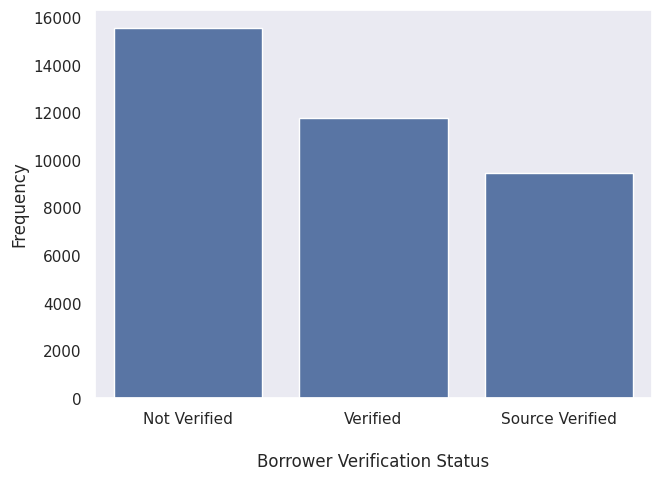

In [77]:
gm.renderBarPlot("verification_status","\nBorrower Verification Status",'Frequency',0)

In [78]:
value_counts = loan_data_df.verification_status.value_counts()
(value_counts / len(loan_data_df)) * 100

verification_status
Not Verified       42.266304
Verified           31.964674
Source Verified    25.769022
Name: count, dtype: float64

#### Findings

- The largest segment of borrowers (42%) falls under the "Not Verified" category, meaning their stated income hasn't been confirmed. This raises significant concerns about the accuracy of their financial information and their ability to repay loans.

-  A smaller portion (32%) of borrowers have "Verified" incomes, indicating some level of income confirmation. However, this still leaves a substantial number of borrowers without thorough income verification.

- Only a small fraction (26%) of borrowers are categorized as "Source Verified," meaning they have provided the strongest proof of income. This lack of comprehensive verification for the majority of borrowers could increase the lender's exposure to risk.

***

#### <font color=orange> 11. Analysing issue year, month and day of week </font>

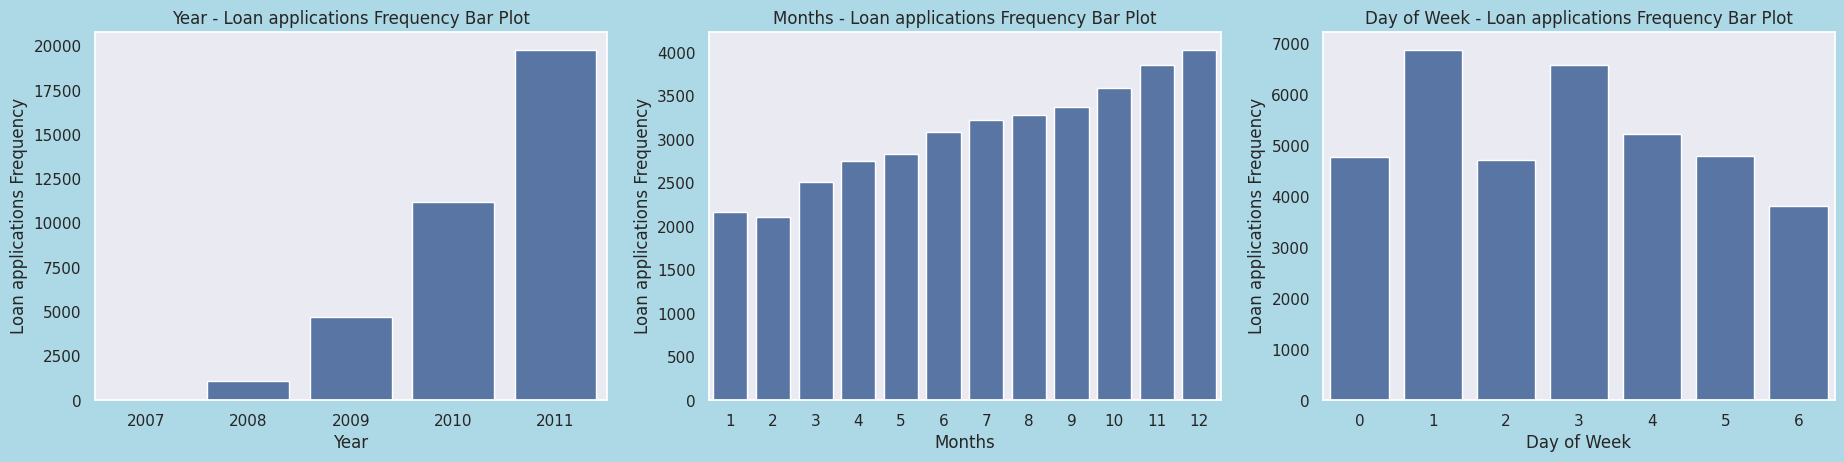

In [79]:
# Here I didnt renderBarPlot function becasue I wanted to show three charts together
plt.figure(figsize=(20,10),facecolor='lightblue')
sns.set_style("dark")

plt.subplot(2, 3, 1)
col_value_counts = loan_data_df['issue_d_year'].value_counts()
col_index = col_value_counts.index
bar_lot = sns.barplot(x=col_index, y=col_value_counts)
bar_lot.set(xlabel='Year')
bar_lot.set(ylabel='Loan applications Frequency')
bar_lot.set_title('Year - Loan applications Frequency Bar Plot')
plt.xticks(rotation=0)

plt.subplot(2, 3, 2)
col_value_counts = loan_data_df['issue_d_month'].value_counts()
col_index = col_value_counts.index
bar_lot = sns.barplot(x=col_index, y=col_value_counts)
bar_lot.set(xlabel='Months')
bar_lot.set(ylabel='Loan applications Frequency')
bar_lot.set_title('Months - Loan applications Frequency Bar Plot')
plt.xticks(rotation=0)

plt.subplot(2, 3, 3)
col_value_counts = loan_data_df['issue_d_dayofweek'].value_counts()
col_index = col_value_counts.index
bar_lot = sns.barplot(x=col_index, y=col_value_counts)
bar_lot.set(xlabel='Day of Week')
bar_lot.set(ylabel='Loan applications Frequency')
bar_lot.set_title('Day of Week - Loan applications Frequency Bar Plot')
plt.xticks(rotation=0)

plt.show()

### Findings

-  Loan applications experienced a significant surge between 2007 and 2011, nearly doubling each year. This indicates a growing demand for loans during this period and suggests a potential expansion of the lender's customer base or increased marketing efforts.
- There is a clear seasonal pattern in loan applications, with a steady increase from the beginning of the year and peaking in the last quarter (October to December). This could be attributed to various factors like holiday spending, year-end financial planning, or specific promotional campaigns.
- Loan applications are most frequent on Mondays and Wednesdays, followed by a decline over the rest of the week. This suggests borrowers may prefer to initiate loan applications at the beginning and middle of the work week, possibly due to convenience or aligning with financial planning cycles.

***

#### <font color=orange> 12. Analysing Loan Status column </font>

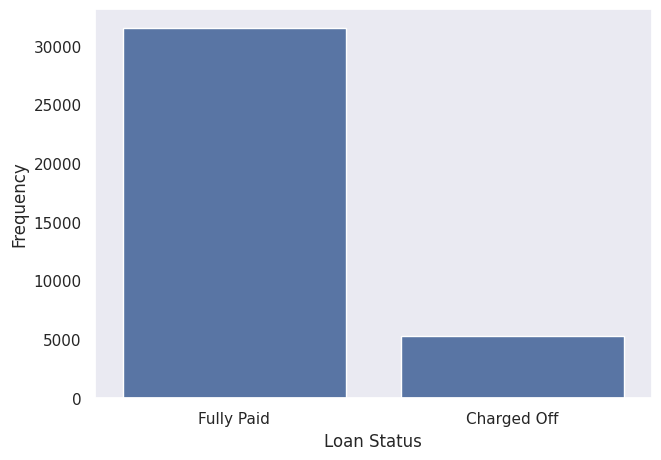

In [80]:
gm.renderBarPlot("loan_status","Loan Status",'Frequency',0)

In [81]:
value_counts = loan_data_df.loan_status.value_counts()
(value_counts / len(loan_data_df)) * 100

loan_status
Fully Paid     85.690217
Charged Off    14.309783
Name: count, dtype: float64

#### Findings

- The loan portfolio exhibits a healthy repayment rate, with 85% of loans fully paid, indicating a positive outlook despite a 15% default rate that necessitates risk mitigation strategies.

***

#### <font color=orange> 13. Analysing Loan purpose </font>


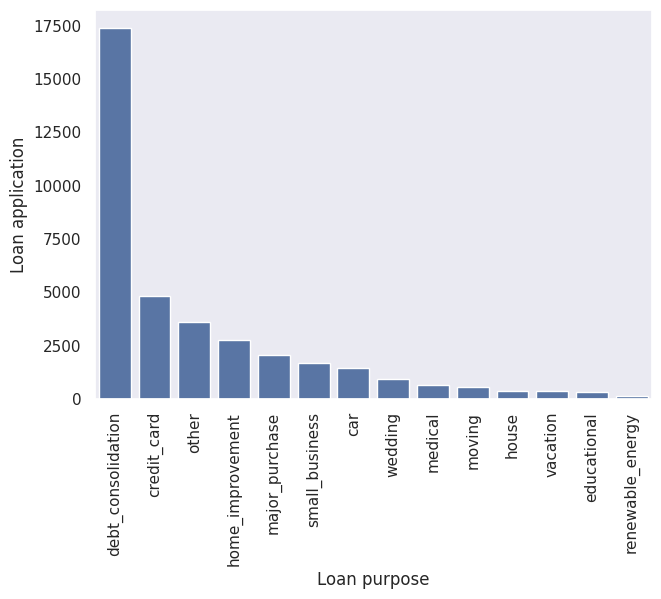

In [82]:
gm.renderBarPlot("purpose","Loan purpose",'Loan application',90)

In [83]:
value_counts = loan_data_df.purpose.value_counts()
(value_counts / len(loan_data_df)) * 100

purpose
debt_consolidation    47.209239
credit_card           13.040761
other                  9.769022
home_improvement       7.429348
major_purchase         5.584239
small_business         4.500000
car                    3.883152
wedding                2.426630
medical                1.752717
moving                 1.470109
house                  0.948370
vacation               0.926630
educational            0.804348
renewable_energy       0.255435
Name: count, dtype: float64

#### Findings

- The chart overwhelmingly demonstrates that borrowers primarily seek loans for debt consolidation (47%), highlighting the prevalence of managing existing debts as a key financial concern. This suggests that many individuals may be struggling with multiple debts and are seeking to simplify their repayment by consolidating them into a single loan.

- While debt consolidation is the leading purpose, credit card debt emerges as a substantial secondary reason (13%). This emphasizes the widespread reliance on credit cards and the potential challenges individuals face in managing their credit card balances. This could indicate a need for financial education or alternative credit solutions to address the issue of credit card debt.


***

#### <font color=orange> 14. Analysing Address State column </font>

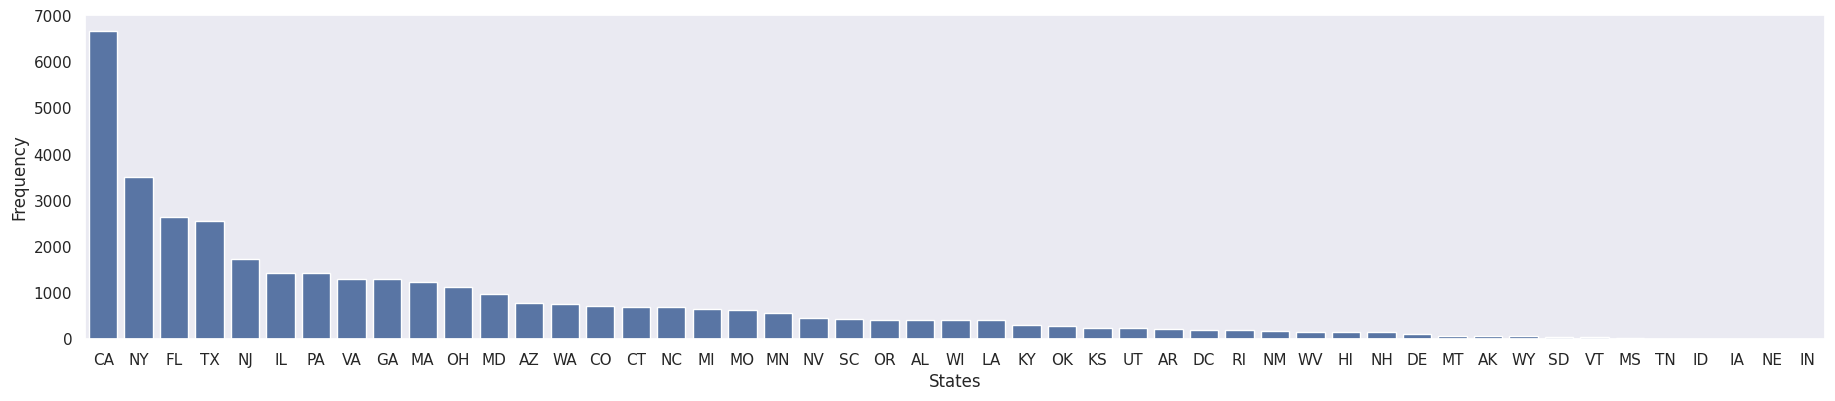

In [84]:
plt.figure(figsize=(20,4))
gm.renderBarPlot("addr_state","States",'Frequency',0)

In [85]:
value_counts = loan_data_df.addr_state.value_counts()
(value_counts / len(loan_data_df)) * 100

addr_state
CA    18.146739
NY     9.540761
FL     7.176630
TX     6.942935
NJ     4.701087
IL     3.883152
PA     3.869565
VA     3.548913
GA     3.516304
MA     3.339674
OH     3.059783
MD     2.657609
AZ     2.149457
WA     2.065217
CO     1.959239
CT     1.894022
NC     1.885870
MI     1.798913
MO     1.736413
MN     1.559783
NV     1.250000
SC     1.203804
OR     1.125000
AL     1.114130
WI     1.108696
LA     1.108696
KY     0.828804
OK     0.763587
KS     0.654891
UT     0.654891
AR     0.605978
DC     0.559783
RI     0.516304
NM     0.470109
WV     0.445652
HI     0.434783
NH     0.418478
DE     0.290761
MT     0.209239
AK     0.203804
WY     0.203804
SD     0.160326
VT     0.138587
MS     0.051630
TN     0.027174
ID     0.010870
IA     0.002717
NE     0.002717
IN     0.002717
Name: count, dtype: float64

#### Findings

The geographic distribution of borrowers reveals a concentration in California and New York, with a long tail of states with smaller shares, indicating varying market penetration across the country.

***

#### <font color=orange> 15. Analysing DTI - Debt to income ratio </font>

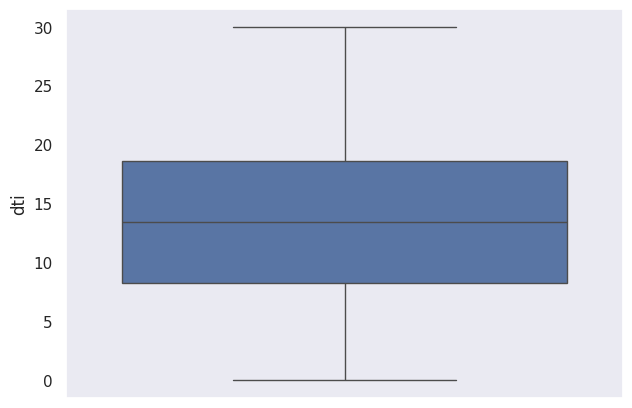

In [86]:
sns.boxplot(loan_data_df.dti)
plt.show()

#### Findings

The boxplot illustrates that the majority of borrowers have a debt-to-income (DTI) ratio below 30%, with the median DTI sitting at 15%, which is well below the preferred threshold of 36%. This suggests that most borrowers in the dataset have a healthy financial balance, with a manageable level of debt relative to their income, making them more attractive to lenders. However, there are a few outliers with DTI exceeding 30%, indicating a small portion of borrowers with potentially higher risk profiles due to higher debt burdens.


***

#### <font color=orange> 16. Analysing earliest credit line column</font>

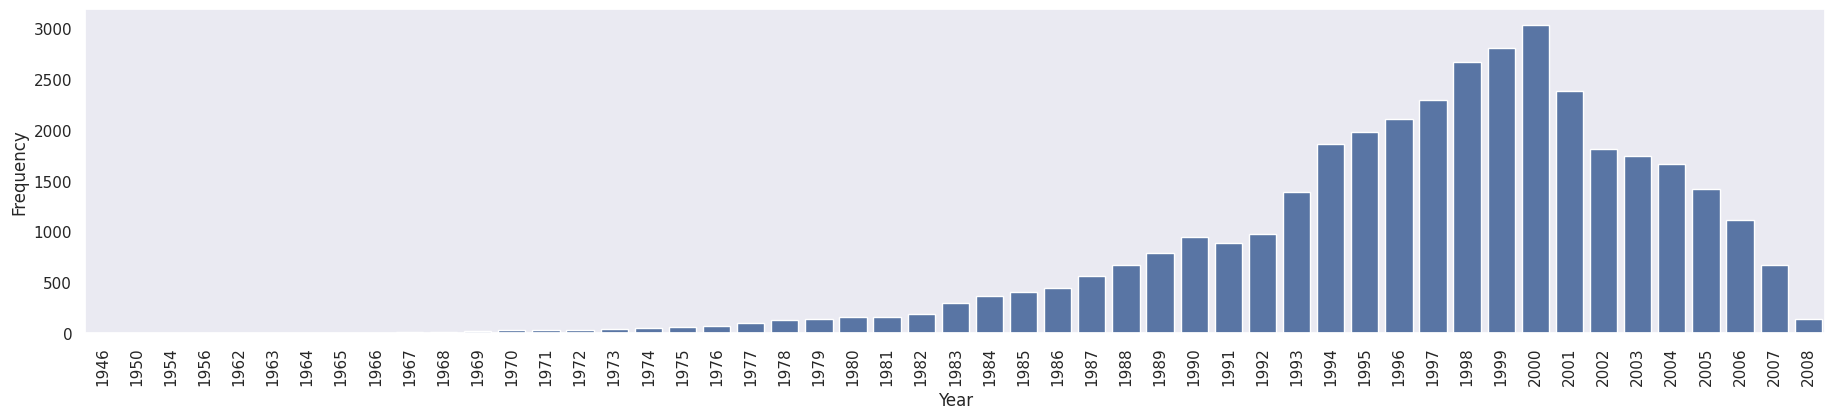

In [87]:
plt.figure(figsize=(20,4))
gm.renderBarPlot("earliest_cr_year","Year",'Frequency',90)

In [88]:
value_counts = loan_data_df.earliest_cr_year.value_counts()
(value_counts / len(loan_data_df)) * 100

earliest_cr_year
2000    8.250000
1999    7.622283
1998    7.250000
2001    6.480978
1997    6.228261
1996    5.741848
1995    5.394022
1994    5.059783
2002    4.929348
2003    4.755435
2004    4.532609
2005    3.872283
1993    3.769022
2006    3.029891
1992    2.652174
1990    2.576087
1991    2.429348
1989    2.138587
2007    1.839674
1988    1.820652
1987    1.535326
1986    1.217391
1985    1.105978
1984    0.989130
1983    0.823370
1982    0.527174
1981    0.434783
1980    0.426630
2008    0.391304
1979    0.372283
1978    0.369565
1977    0.266304
1976    0.201087
1975    0.179348
1974    0.144022
1973    0.122283
1971    0.103261
1970    0.100543
1972    0.092391
1969    0.070652
1967    0.040761
1968    0.038043
1966    0.021739
1965    0.016304
1963    0.010870
1962    0.008152
1964    0.008152
1956    0.002717
1946    0.002717
1950    0.002717
1954    0.002717
Name: count, dtype: float64

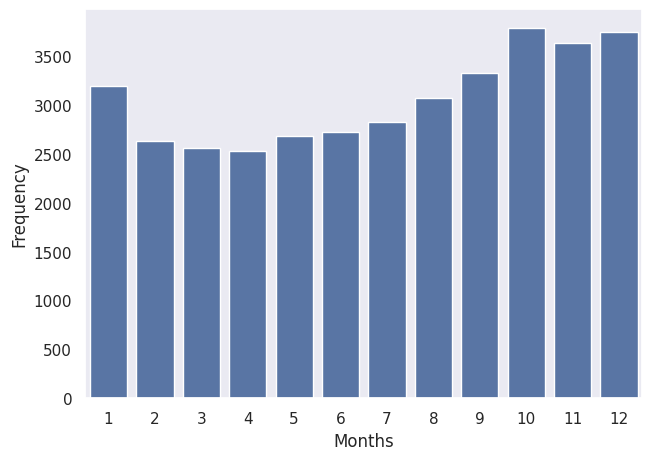

In [89]:
gm.renderBarPlot("earliest_cr_month","Months",'Frequency',0)

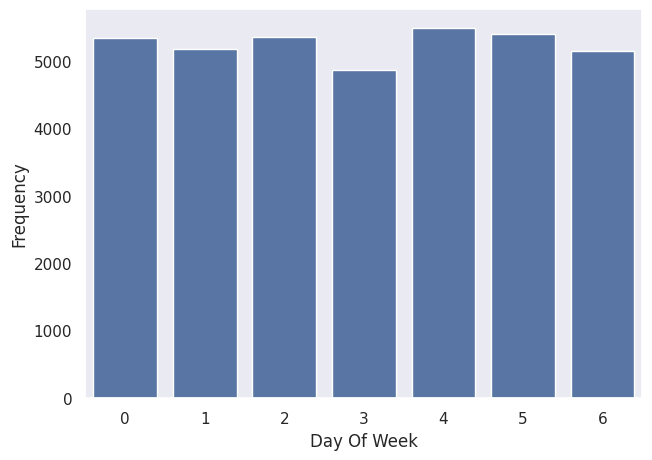

In [90]:
gm.renderBarPlot("earliest_cr_dayofweek","Day Of Week",'Frequency',0)

#### Findings

With most credit lines established in 2000, there's a corresponding surge in loan applications towards the year-end, specifically in the last quarter. This suggests that borrowers tend to utilize credit lines soon after they are established, particularly during periods of increased financial activity like the holiday season.

***

#### <font color=orange> 17. Analysing public derogatory record fields</font>

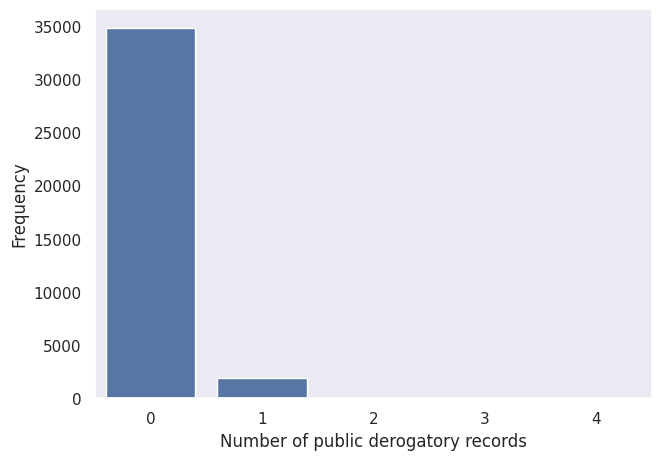

In [91]:
gm.renderBarPlot("pub_rec","Number of public derogatory records",'Frequency',0)

In [92]:
value_counts = loan_data_df.pub_rec.value_counts()
(value_counts / len(loan_data_df)) * 100

pub_rec
0    94.758152
1     5.095109
2     0.122283
3     0.019022
4     0.005435
Name: count, dtype: float64

#### Findings

The vast majority of borrowers (95%) have no public derogatory records, signifying a low-risk borrower pool and a positive outlook for loan repayment.

***

#### <font color=orange> 18. Analysing public record for bankrupties </font>

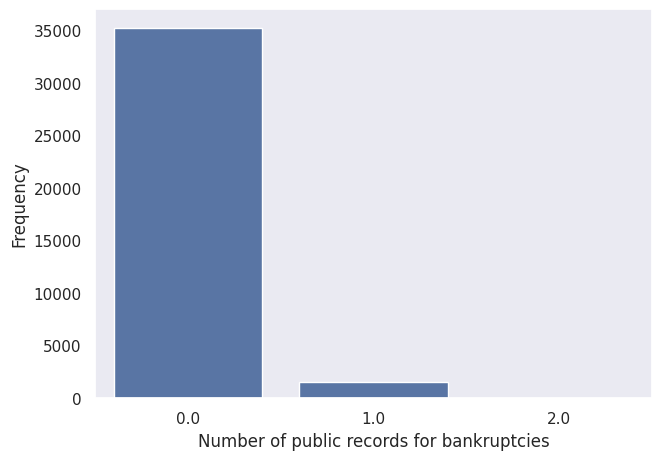

In [93]:
gm.renderBarPlot("pub_rec_bankruptcies","Number of public records for bankruptcies",'Frequency',0)

In [94]:
value_counts = loan_data_df.pub_rec_bankruptcies.value_counts()
(value_counts / len(loan_data_df)) * 100

pub_rec_bankruptcies
0.0    95.831522
1.0     4.154891
2.0     0.013587
Name: count, dtype: float64

#### Findings

The vast majority of borrowers (approximately 96%) have no record of bankruptcy, as indicated by the tall bar at 0.0. This demonstrates a high degree of financial responsibility and stability among the borrower pool, suggesting a lower risk of default.

***

## <font color=magenta> Segmented Univariate Analysis </font>

To gain a deeper understanding of the loan dataset, we will conduct a detailed analysis of the relationships between various variables. This will involve grouping the data into categories and comparing them using descriptive statistics and visual representations, primarily boxplots.

We will begin by exploring the interplay between loan amount and loan term. This will allow us to discern any patterns or trends that may exist between these two key variables. By utilizing boxplots, we can effectively visualize and compare the distributions of loan amounts across different loan terms.

In [95]:
def createSegmentedBoxPlot(x,y,data,order=None):
        sns.boxplot(x=x,y=y,order=order,data=data)
        plt.show()

In [96]:
def createSegmentedBarPlot(x,y,hue,data):
    sns.barplot(x=x,y=y,hue=hue,data=data)
    plt.show()

***

### 1. Analyzing Terms and Loan Amount fields together

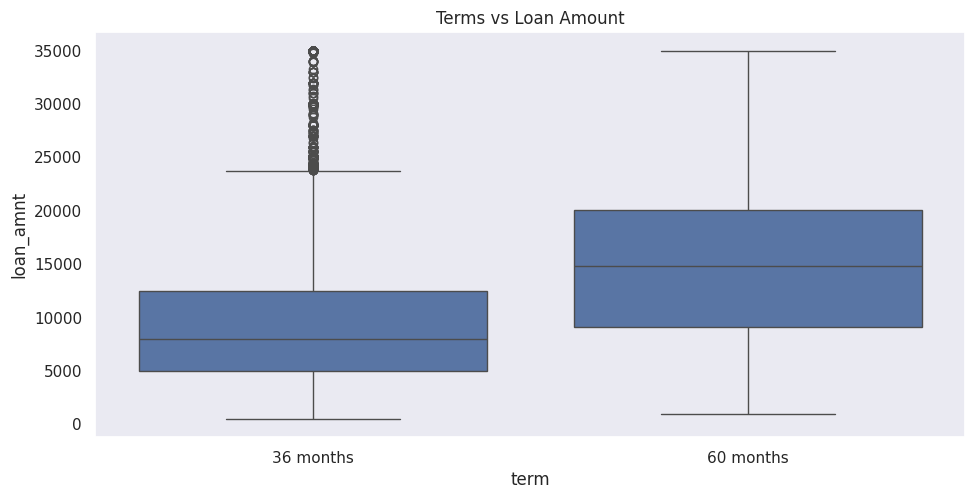

In [97]:
plt.figure(figsize=(10,5))
plt.title('Terms vs Loan Amount')
createSegmentedBoxPlot('term',loan_data_df.loan_amnt,data=loan_data_df)

The boxplot illustrates a clear relationship between loan term and loan amount: borrowers opting for longer loan terms (60 months) tend to borrow significantly larger amounts compared to those choosing shorter terms (36 months). This is evident in the median loan amount for 60-month loans being approximately twice that of 36-month loans.

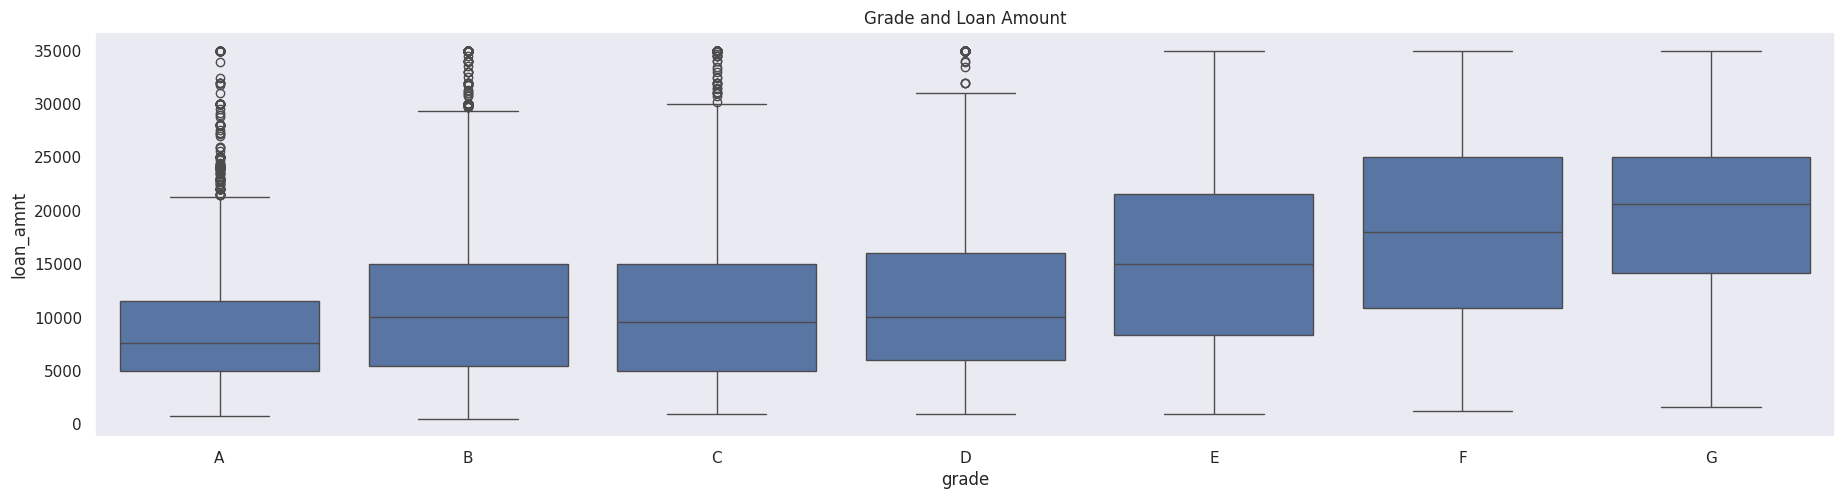

In [98]:
grade_ord = loan_data_df.grade.unique()
grade_ord.sort()
plt.figure(figsize=(20,5))
plt.title('Grade and Loan Amount')
createSegmentedBoxPlot('grade',loan_data_df.loan_amnt,data=loan_data_df,order=grade_ord)

- The boxplot visually confirms a distinct trend where borrowers with lower credit grades (especially C and below) tend to take out larger loan amounts compared to those with higher grades (A and B). This pattern suggests that lenders may be willing to extend larger loans to individuals with lower credit scores, potentially at higher interest rates to compensate for the increased risk.

- This trend raises potential concerns for the lender, as it could indicate a higher risk of default among borrowers with lower credit grades and larger loans. Lenders may need to carefully assess and manage this risk through stricter underwriting criteria, higher interest rates, or other mitigation strategies.

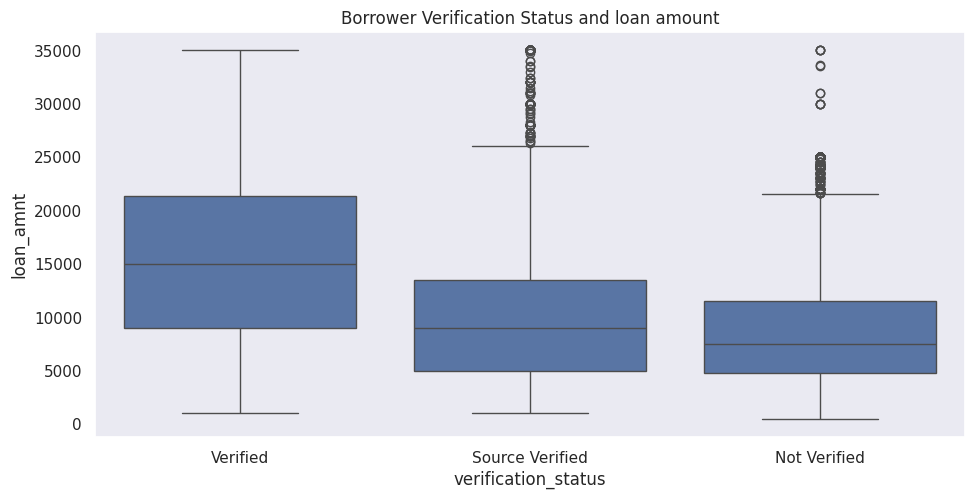

In [99]:
plt.figure(figsize=(10,5))
plt.title('Borrower Verification Status and loan amount')
createSegmentedBoxPlot('verification_status',loan_data_df.loan_amnt,data=loan_data_df)

The income verification process for a significant portion (42%) of borrowers remains incomplete, raising concerns about the accuracy of their financial information and potential risks for the lender.


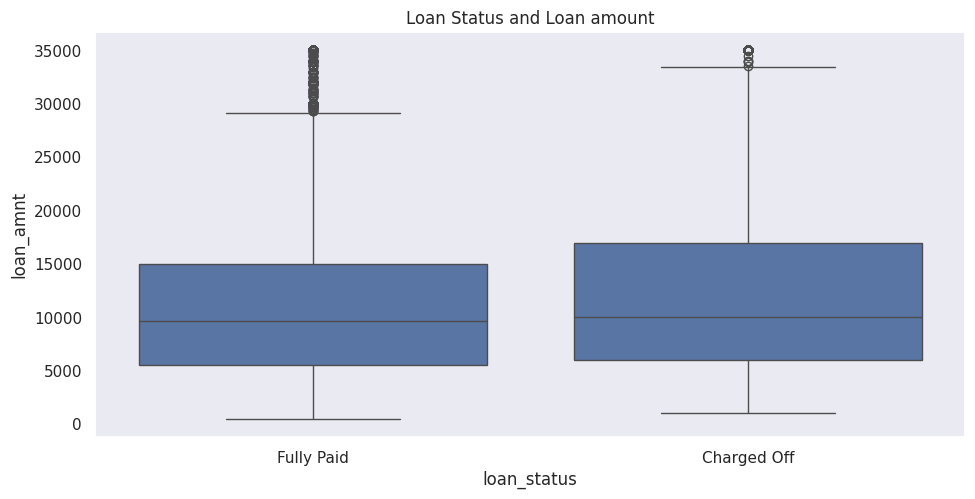

In [100]:
plt.figure(figsize=(10,5))
plt.title('Loan Status and Loan amount')
createSegmentedBoxPlot('loan_status',loan_data_df.loan_amnt,data=loan_data_df)

The analysis reveals a notable positive correlation between loan amounts and the risk of default, suggesting that larger loan sizes may pose a greater challenge for borrowers in terms of repayment.

***

### 2. Analyzing funded amount and loan term fields

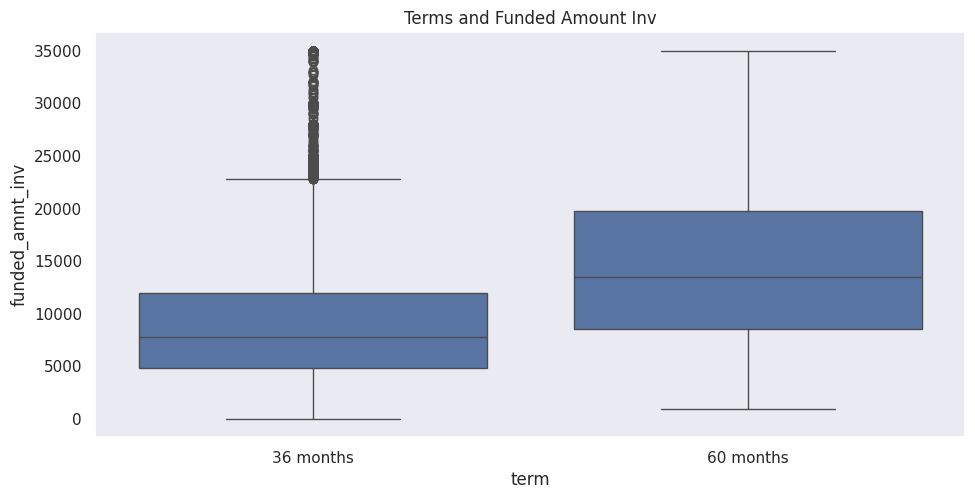

In [101]:
plt.figure(figsize=(10,5))
plt.title('Terms and Funded Amount Inv')
createSegmentedBoxPlot('term',loan_data_df.funded_amnt_inv,data=loan_data_df)

The boxplot illustrates that loans with a longer term (60 months) tend to have a higher funded amount compared to shorter-term loans (36 months). This suggests that investors are generally willing to fund larger loan amounts for longer repayment periods.

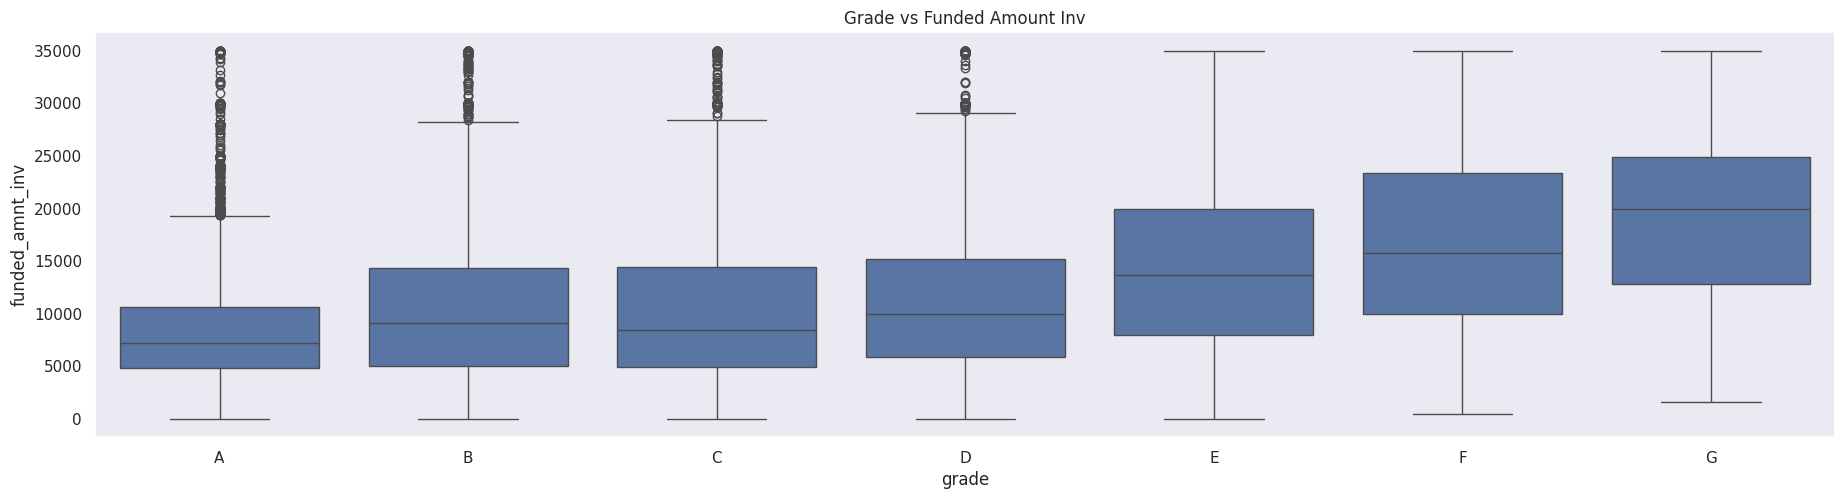

In [102]:
grade_ord = loan_data_df.grade.unique()
grade_ord.sort()
plt.figure(figsize=(20,5))
plt.title('Grade vs Funded Amount Inv')
createSegmentedBoxPlot('grade',loan_data_df.funded_amnt_inv,data=loan_data_df,order=grade_ord)

This illustrates a clear trend where borrowers with lower credit grades (D to G) tend to receive larger loan amounts compared to those with higher grades (A and B). This suggests a higher risk tolerance from lenders for lower-grade borrowers, potentially offset by higher interest rates charged to these individuals, leading to increased potential profits. However, this strategy also carries a higher risk of loan defaults.

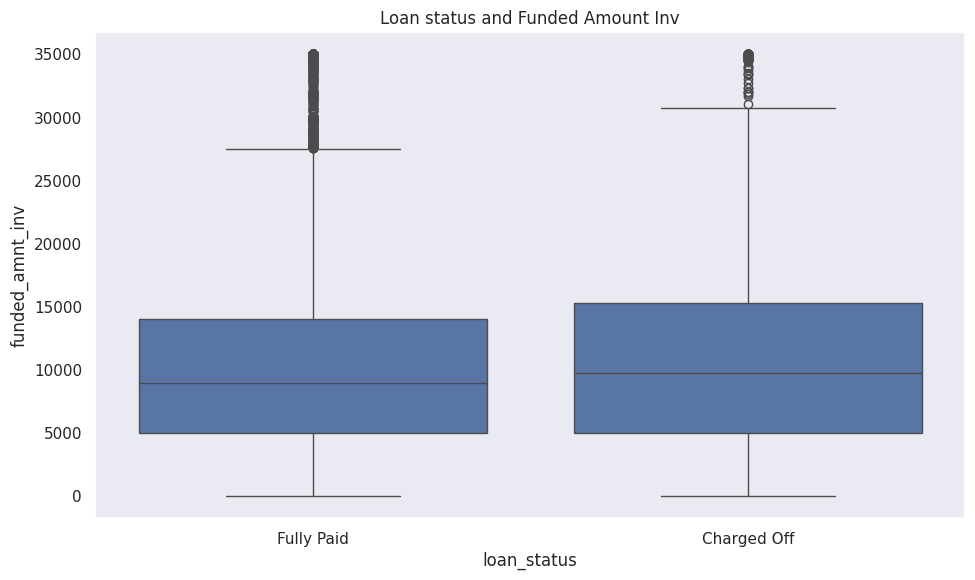

In [103]:
plt.figure(figsize=(10,6))
plt.title('Loan status and Funded Amount Inv')
createSegmentedBoxPlot('loan_status',loan_data_df.funded_amnt_inv,data=loan_data_df)

This illustrates that the median funded amount for both fully paid and charged-off loans is similar. While this suggests that the funded amount may not be a strong predictor of loan outcome in isolation, it's important to consider that the overall proportion of charged-off loans is significantly lower than fully paid loans. Therefore, even a small difference in the funded amount for charged-off loans could represent a substantial financial risk to the len

***

### 3. Analyzing interest rates and loan term fields

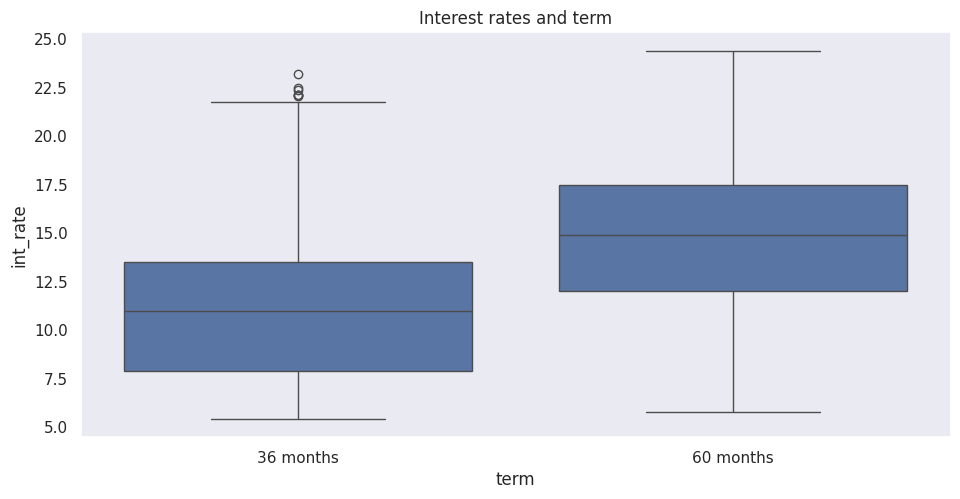

In [104]:
plt.figure(figsize=(10,5))
plt.title('Interest rates and term')
createSegmentedBoxPlot('term',loan_data_df.int_rate,data=loan_data_df)

Higher term or tenure loans have higher interest rates.

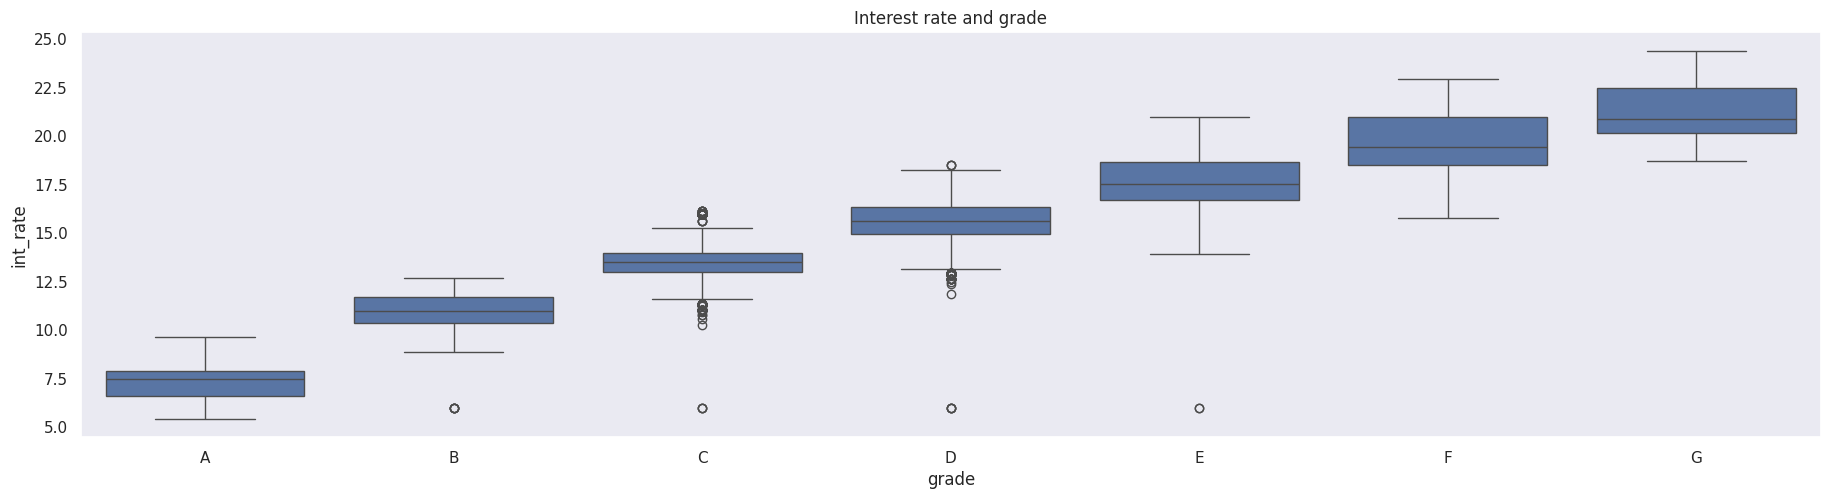

In [105]:
plt.figure(figsize=(20,5))
grade_ord = loan_data_df.grade.unique()
grade_ord.sort()
plt.title('Interest rate and grade')
createSegmentedBoxPlot('grade',loan_data_df.int_rate,data=loan_data_df,order=grade_ord)

 A clear positive correlation between loan grade and interest rate: as the loan grade decreases, the interest rate charged to the borrower increases. This strategy is likely employed to mitigate the increased risk associated with lower credit grades, potentially leading to higher profits for the lender. However, this approach also carries a heightened risk of default, as observed in the higher default rates among borrowers with higher interest rates.

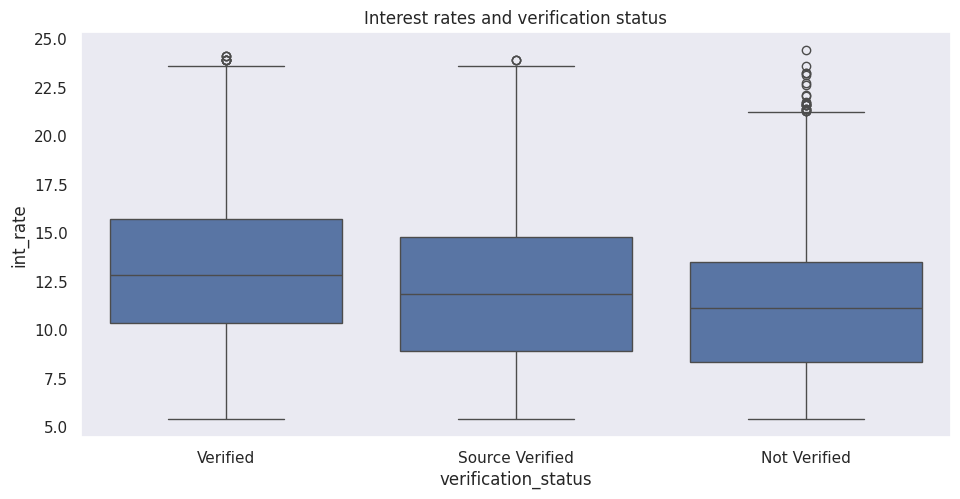

In [106]:
plt.figure(figsize=(10,5))
plt.title('Interest rates and verification status')
createSegmentedBoxPlot('verification_status',loan_data_df.int_rate,data=loan_data_df)

The current lending model presents a counterintuitive scenario where borrowers with unverified incomes receive lower interest rates compared to those with verified income sources, potentially leading to adverse selection and increased risk for the lender.

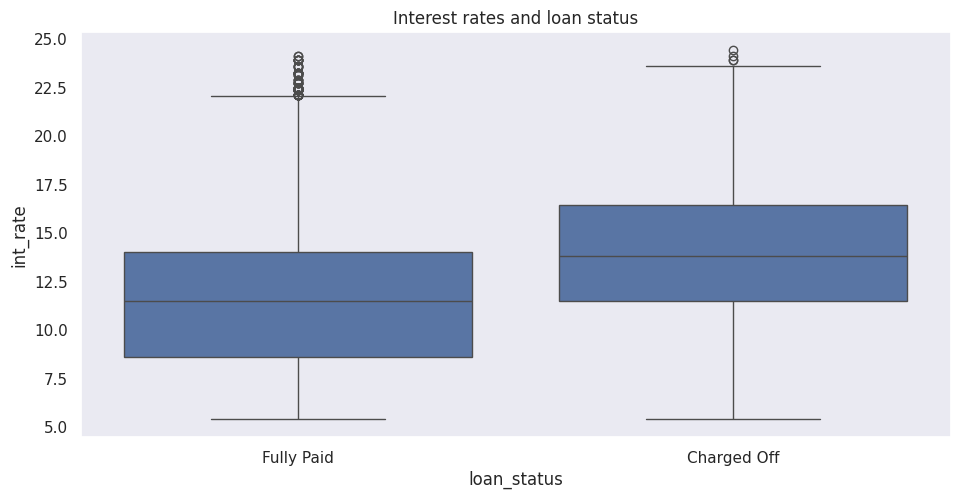

In [107]:
plt.figure(figsize=(10,5))
plt.title('Interest rates and loan status')
createSegmentedBoxPlot('loan_status',loan_data_df.int_rate,data=loan_data_df)

As mentioned earlier, here higher interest rates are leading to more default.

***

### 4. Analyzing DTI (Debt to income ration) and loan term

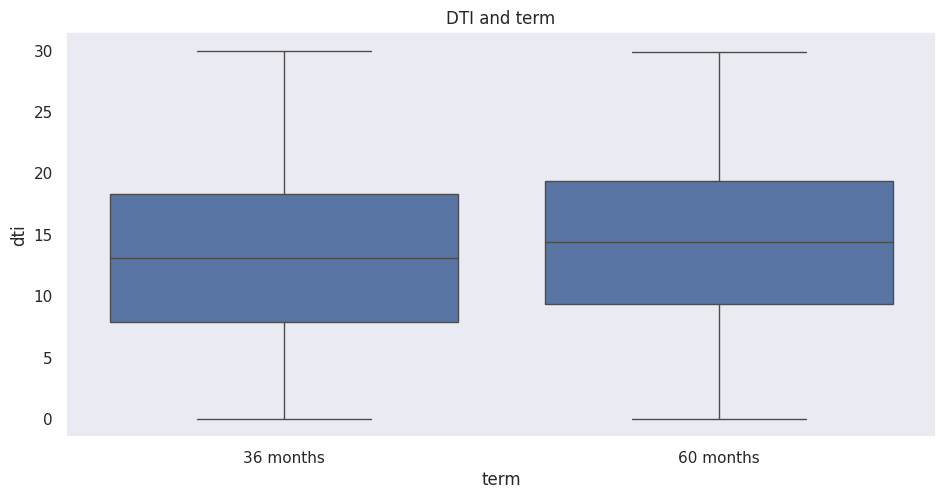

In [108]:
plt.figure(figsize=(10,5))
plt.title('DTI and term')
createSegmentedBoxPlot('term',loan_data_df.dti,data=loan_data_df)

This shows that borrowers with longer loan terms (60 months) tend to have a slightly higher debt-to-income (DTI) ratio compared to those with shorter loan terms (36 months). This suggests that individuals opting for longer repayment periods may have a higher debt burden relative to their income.

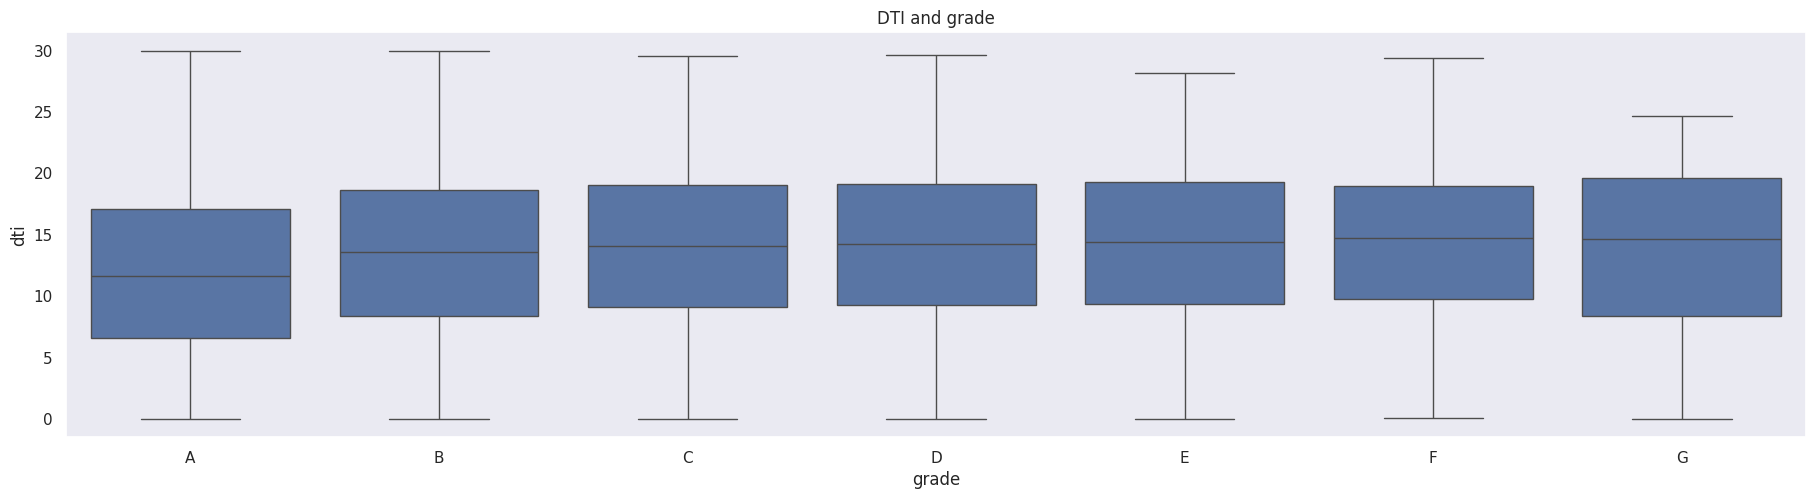

In [109]:
plt.figure(figsize=(20,5))
grade_ord = loan_data_df.grade.unique()
grade_ord.sort()
plt.title('DTI and grade')
createSegmentedBoxPlot('grade',loan_data_df.dti,data=loan_data_df,order=grade_ord)

while the median Debt-to-Income (DTI) ratio remains below 30% across all loan grades (A-G), there is a noticeable trend of gradually increasing DTIs as credit grades decrease. This suggests that borrowers with lower credit scores tend to have higher debt burdens relative to their incomes. While this doesn't necessarily indicate an immediate risk, it underscores the importance of closely monitoring these borrowers, as higher DTIs could potentially lead to increased default rates. Maintaining a lower DTI is generally preferable for ensuring a higher likelihood of successful loan repayment.

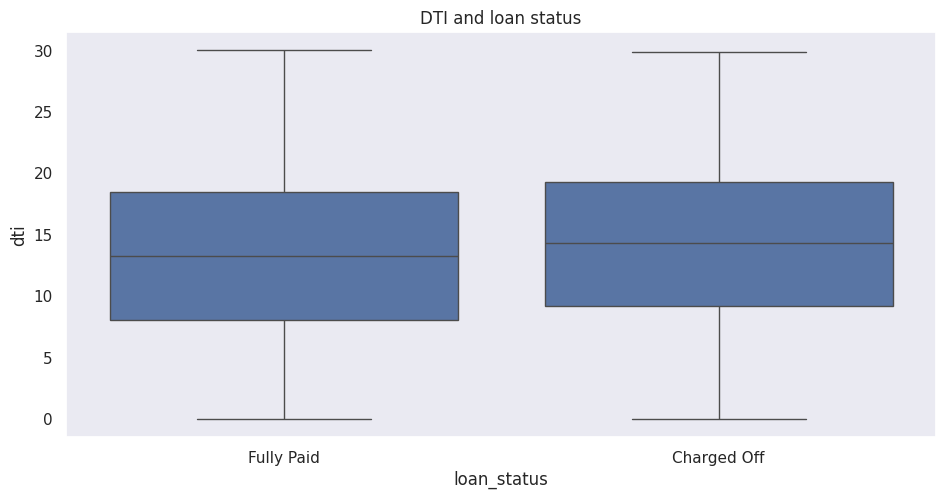

In [110]:
plt.figure(figsize=(10,5))
plt.title('DTI and loan status')
createSegmentedBoxPlot('loan_status',loan_data_df.dti,data=loan_data_df)

Borrowers who defaulted (charged off) had a slightly higher median debt-to-income (DTI) ratio compared to those who fully paid their loans. This suggests that while DTI may be a factor in loan default, it's not the sole determinant.

***

### 5. Analyzing with public derogatory record with respect to loan term

In [111]:
pub_rec_data = loan_data_df.groupby(['pub_rec','term'],as_index=False)['id'].count()

In [112]:
sum_pub_rec_data = pub_rec_data.groupby('pub_rec')['id'].transform('sum')
pub_rec_data['percentage'] = pub_rec_data['id'] / sum_pub_rec_data * 100
pub_rec_data

pub_rec       term     id  percentage
0        0  36 months  26152   74.996415
1        0  60 months   8719   25.003585
2        1  36 months   1349   71.946667
3        1  60 months    526   28.053333
4        2  36 months     36   80.000000
5        2  60 months      9   20.000000
6        3  36 months      7  100.000000
7        4  36 months      2  100.000000

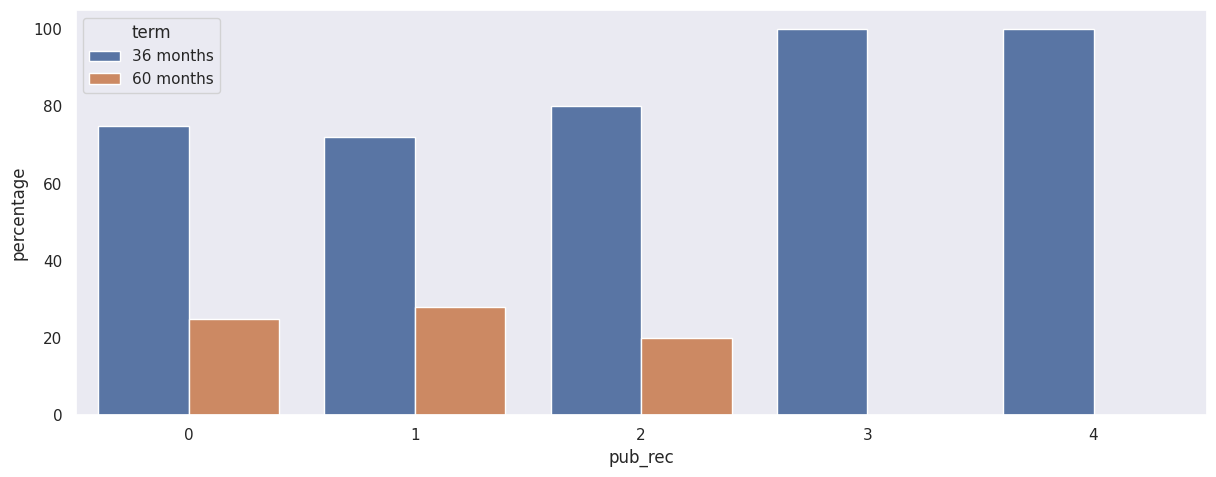

In [113]:
plt.figure(figsize=(13,5))
createSegmentedBarPlot('pub_rec','percentage','term',pub_rec_data)

The analysis reveals a preference for 36-month loan terms across all levels of public derogatory records, suggesting that borrowers, regardless of their credit history, tend to favor shorter repayment periods.

In [114]:
pub_rec_data = loan_data_df.groupby(['pub_rec','grade'],as_index=False)['id'].count()

In [115]:
sum_pub_rec_data = pub_rec_data.groupby('pub_rec')['id'].transform('sum')
pub_rec_data['percentage'] = pub_rec_data['id'] / sum_pub_rec_data * 100
pub_rec_data

pub_rec grade     id  percentage
0         0     A   9384   26.910613
1         0     B  10561   30.285911
2         0     C   6925   19.858909
3         0     D   4497   12.896103
4         0     E   2378    6.819420
5         0     F    856    2.454762
6         0     G    270    0.774282
7         1     A    132    7.040000
8         1     B    576   30.720000
9         1     C    529   28.213333
10        1     D    344   18.346667
11        1     E    190   10.133333
12        1     F     80    4.266667
13        1     G     24    1.280000
14        2     A      2    4.444444
15        2     B      9   20.000000
16        2     C     16   35.555556
17        2     D     10   22.222222
18        2     E      5   11.111111
19        2     F      3    6.666667
20        3     B      2   28.571429
21        3     C      4   57.142857
22        3     E      1   14.285714
23        4     B      1   50.000000
24        4     D      1   50.000000

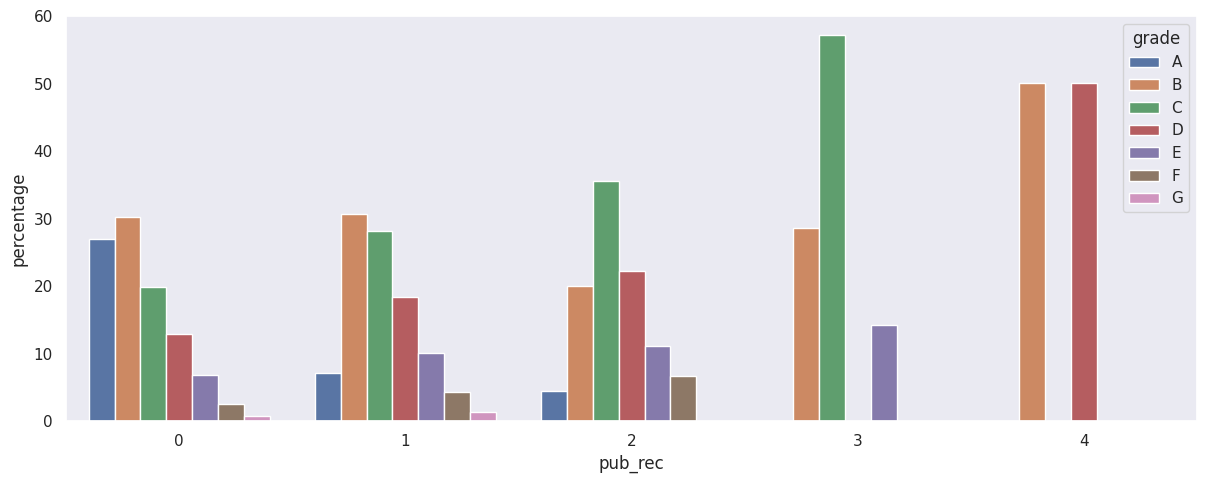

In [116]:
plt.figure(figsize=(13,5))
createSegmentedBarPlot('pub_rec','percentage','grade',pub_rec_data)

The analysis reveals a negative correlation between credit grade and the likelihood of having public derogatory records, with higher-grade borrowers (A) showing a significantly lower incidence of such records compared to lower grades (B, C, and D).

***

### 6. Evaluating more and see how it impacts the loan status

In [117]:
pub_rec_data = loan_data_df.groupby(['pub_rec','loan_status'],as_index=False)['id'].count()
pub_rec_data

pub_rec  loan_status     id
0        0  Charged Off   4838
1        0   Fully Paid  30033
2        1  Charged Off    418
3        1   Fully Paid   1457
4        2  Charged Off     10
5        2   Fully Paid     35
6        3   Fully Paid      7
7        4   Fully Paid      2

In [118]:
sum_pub_rec_data = pub_rec_data.groupby('pub_rec')['id'].transform('sum')
pub_rec_data['percentage'] = pub_rec_data['id'] / sum_pub_rec_data * 100
pub_rec_data

pub_rec  loan_status     id  percentage
0        0  Charged Off   4838   13.873993
1        0   Fully Paid  30033   86.126007
2        1  Charged Off    418   22.293333
3        1   Fully Paid   1457   77.706667
4        2  Charged Off     10   22.222222
5        2   Fully Paid     35   77.777778
6        3   Fully Paid      7  100.000000
7        4   Fully Paid      2  100.000000

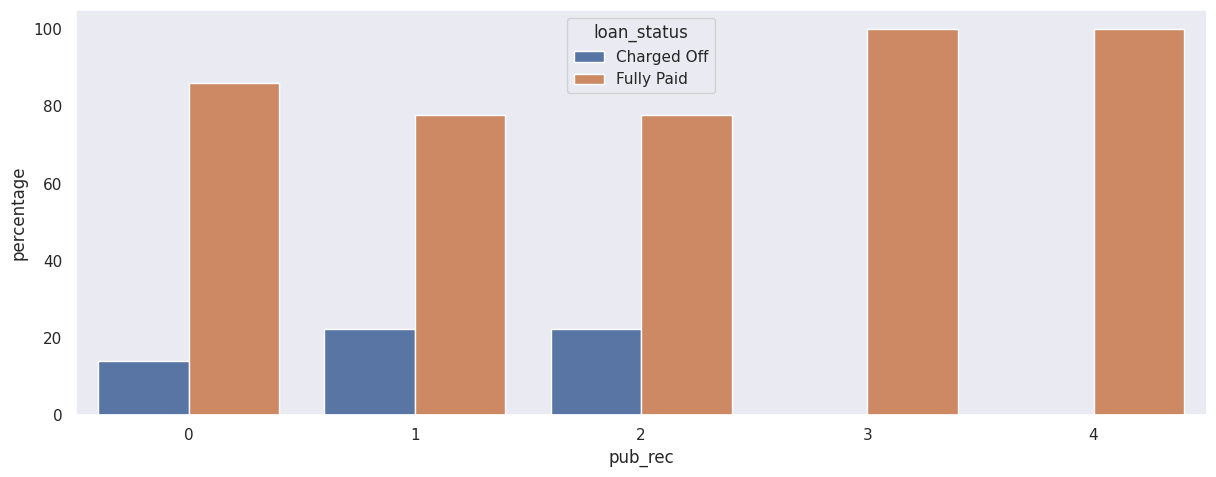

In [119]:
plt.figure(figsize=(13,5))
createSegmentedBarPlot('pub_rec','percentage','loan_status',pub_rec_data)


The analysis reveals a higher risk of default for borrowers with one or two public derogatory records, but the limited data on those with more records suggests a cautious lending approach towards individuals with extensive negative credit history.

## <font color=magenta> Bivariate Analysis </font>

#### 1. Analyzing the term with the loan status

In [120]:
loan_bivariate_term_data = loan_data_df.groupby(['term','loan_status'],as_index=False)['id'].count()
loan_bivariate_term_data

term  loan_status     id
0  36 months  Charged Off   2943
1  36 months   Fully Paid  24603
2  60 months  Charged Off   2323
3  60 months   Fully Paid   6931

In [121]:
sum_loan_bivariate_term_data = loan_bivariate_term_data.groupby('term')['id'].transform('sum')
loan_bivariate_term_data['percentage'] = loan_bivariate_term_data['id'] / sum_loan_bivariate_term_data * 100
loan_bivariate_term_data

term  loan_status     id  percentage
0  36 months  Charged Off   2943   10.683947
1  36 months   Fully Paid  24603   89.316053
2  60 months  Charged Off   2323   25.102658
3  60 months   Fully Paid   6931   74.897342

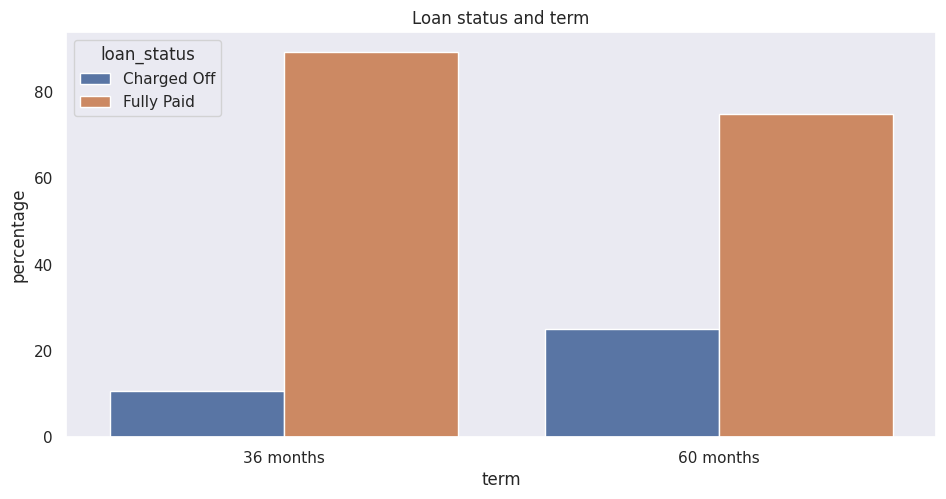

In [122]:
plt.figure(figsize=(10,5))
plt.title("Loan status and term")
createSegmentedBarPlot('term','percentage','loan_status',loan_bivariate_term_data)

Borrowers with 60-month loans default more frequently than those with 36-month terms, suggesting that longer loan durations correlate with higher default rates. This trend highlights the increased risk associated with extended repayment periods.

***

#### 2. Analyzing the term with the loan amount

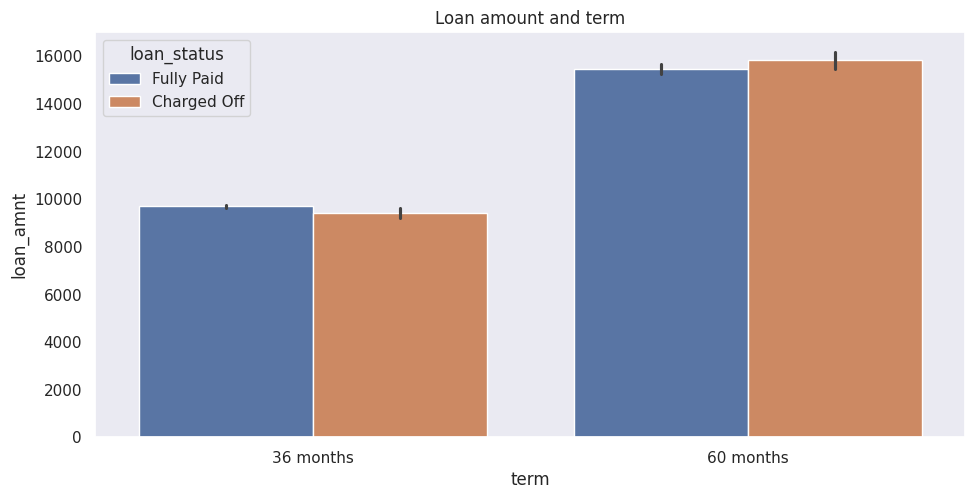

In [123]:
plt.figure(figsize=(10,5))
plt.title("Loan amount and term")
createSegmentedBarPlot('term','loan_amnt','loan_status',loan_data_df)

Loan size appears to have little correlation with default rates. Analysis shows a similar distribution of fully paid and defaulted loans across various loan amounts, suggesting that the borrowed sum alone is not a strong predictor of default risk.

***

#### 3. Analyzing to see whether interest rates affects the default rate

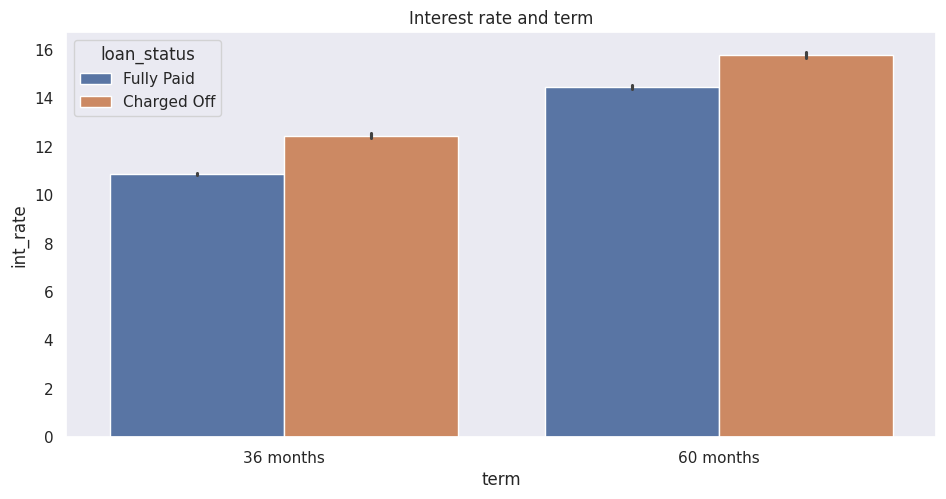

In [124]:
plt.figure(figsize=(10,5))
plt.title("Interest rate and term")
createSegmentedBarPlot('term','int_rate','loan_status',loan_data_df)

As expected, higher interest rates correlate with increased loan defaults, regardless of loan terms. However, a notable observation emerges: the gap in interest rates between fully paid loans and defaulted loans is relatively narrow.

This subtle difference suggests that even minor adjustments to interest rates could potentially shift the balance towards more fully paid loans. Lenders might consider fine-tuning their interest rate strategies to optimize loan performance and reduce default risk.

***

#### 4. Checking if debt to income ration impacts the default rate

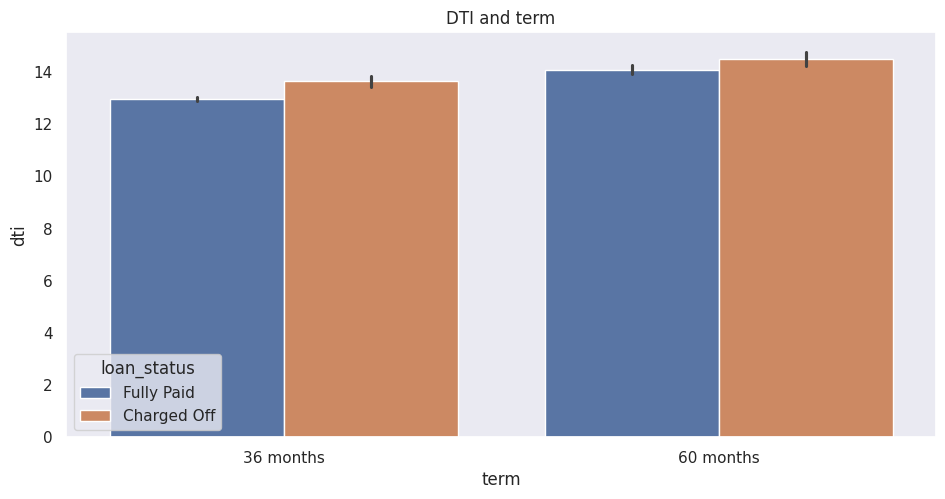

In [125]:
plt.figure(figsize=(10,5))
plt.title("DTI and term")
createSegmentedBarPlot('term','dti','loan_status',loan_data_df)

Analysis reveals a correlation between debt-to-income (DTI) ratios and loan repayment success across both 36-month and 60-month terms. Borrowers with lower DTI ratios demonstrate a higher likelihood of fully repaying their loans, while those with higher DTI ratios show an increased tendency to default.


However, the distinction between these groups is less pronounced than one might expect. This observation suggests that even modest adjustments to lending criteria or borrower support strategies could potentially yield significant improvements in loan repayment rates.


Having established the influence of loan terms on default rates, we now turn our attention to another critical factor: loan grades. This analysis aims to uncover the relationship between assigned loan grades and the likelihood of default.

In [126]:
loan_bivariate_grade_data = loan_data_df.groupby(['grade','loan_status'],as_index=False)['id'].count()
loan_bivariate_grade_data

grade  loan_status    id
0      A  Charged Off   552
1      A   Fully Paid  8966
2      B  Charged Off  1326
3      B   Fully Paid  9823
4      C  Charged Off  1251
5      C   Fully Paid  6223
6      D  Charged Off  1049
7      D   Fully Paid  3803
8      E  Charged Off   686
9      E   Fully Paid  1888
10     F  Charged Off   304
11     F   Fully Paid   635
12     G  Charged Off    98
13     G   Fully Paid   196

In [127]:
sum_loan_bivariate_grade_data = loan_bivariate_grade_data.groupby('grade')['id'].transform('sum')
loan_bivariate_grade_data['percentage'] = loan_bivariate_grade_data['id'] / sum_loan_bivariate_grade_data * 100
loan_bivariate_grade_data

grade  loan_status    id  percentage
0      A  Charged Off   552    5.799538
1      A   Fully Paid  8966   94.200462
2      B  Charged Off  1326   11.893443
3      B   Fully Paid  9823   88.106557
4      C  Charged Off  1251   16.738025
5      C   Fully Paid  6223   83.261975
6      D  Charged Off  1049   21.619951
7      D   Fully Paid  3803   78.380049
8      E  Charged Off   686   26.651127
9      E   Fully Paid  1888   73.348873
10     F  Charged Off   304   32.374867
11     F   Fully Paid   635   67.625133
12     G  Charged Off    98   33.333333
13     G   Fully Paid   196   66.666667

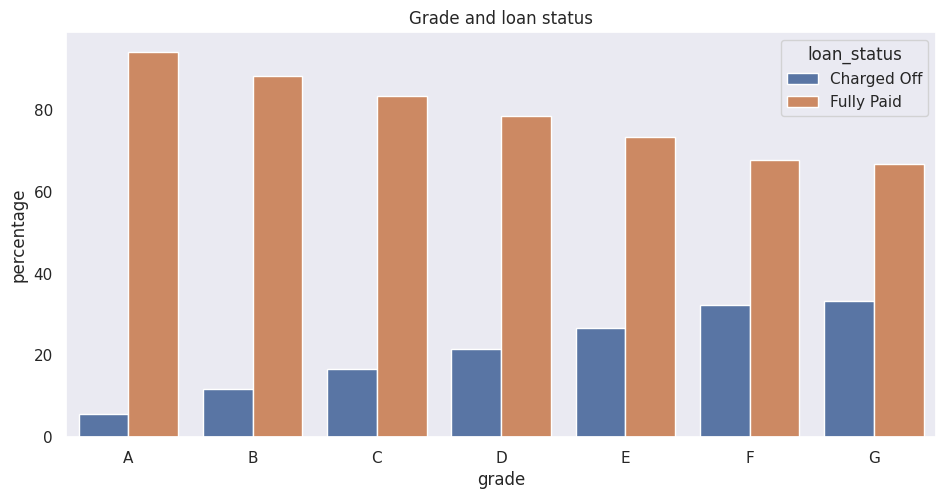

In [128]:
plt.figure(figsize=(10,5))
plt.title("Grade and loan status")
createSegmentedBarPlot('grade','percentage','loan_status',loan_bivariate_grade_data)

Analysis reveals a distinct pattern in the relationship between loan grades and default rates. As loan grades decrease from higher to lower quality, there is a corresponding increase in the number of defaulted loans. This trend aligns with our earlier observations from the univariate analysis, further reinforcing the significant impact of loan grades on default likelihood.

***

#### 5. Analyzing the impact of grade in the loan amount to check for any differences between default rates

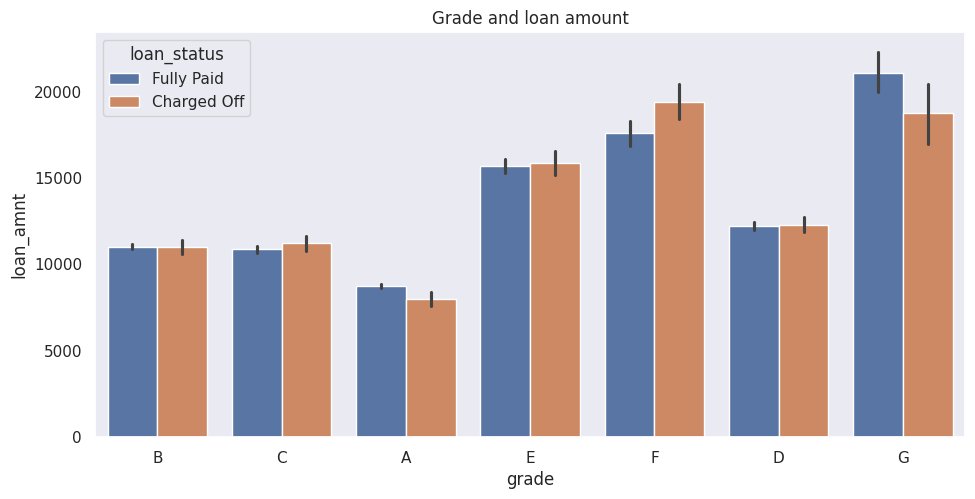

In [129]:
plt.figure(figsize=(10,5))
plt.title("Grade and loan amount")
createSegmentedBarPlot('grade','loan_amnt','loan_status',loan_data_df)

Lower-grade borrowers show higher default rates and, surprisingly, receive larger loan amounts compared to higher-grade borrowers.

This suggests that lenders club may be offering larger loans at higher interest rates to lower-grade borrowers, potentially contributing to increased default rates.

Let's check this in the following graph as well

---



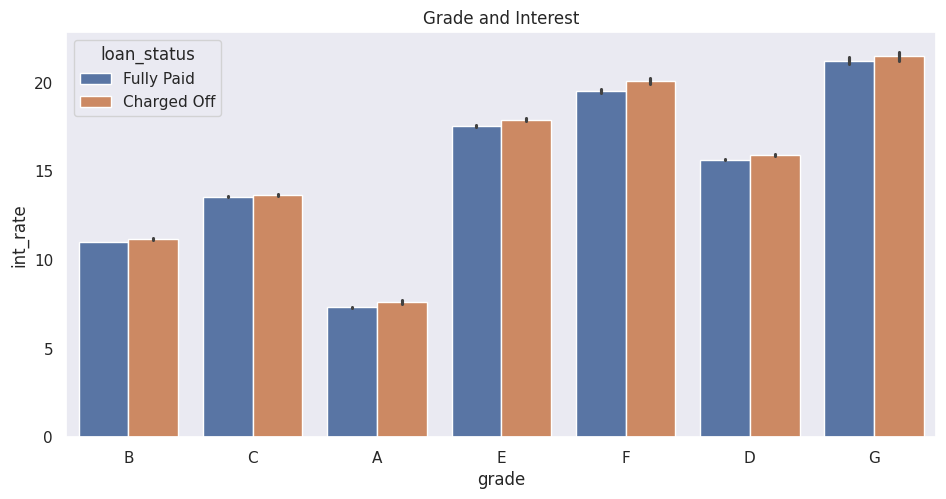

In [130]:
plt.figure(figsize=(10,5))
plt.title("Grade and Interest")
createSegmentedBarPlot('grade','int_rate','loan_status',loan_data_df)

- Borrowers with grades E, F, and G face substantially higher interest rates.
- These rates are nearly double those offered to borrowers with grades A and B.

#### This analysis confirms our earlier hypothesis: the combination of lower credit grades, larger loan amounts, and higher interest rates significantly increases the likelihood of loan default.

***

#### 6. Analyzing if verification status of a borrower impact default rates

In [131]:
loan_bivariate_verification_data = loan_data_df.groupby(['verification_status','loan_status'],as_index=False)['id'].count()
loan_bivariate_verification_data

verification_status  loan_status     id
0        Not Verified  Charged Off   1924
1        Not Verified   Fully Paid  13630
2     Source Verified  Charged Off   1393
3     Source Verified   Fully Paid   8090
4            Verified  Charged Off   1949
5            Verified   Fully Paid   9814

In [132]:
sum_loan_bivariate_verification_data = loan_bivariate_verification_data.groupby('verification_status')['id'].transform('sum')
loan_bivariate_verification_data['percentage'] = loan_bivariate_verification_data['id'] / sum_loan_bivariate_verification_data * 100
loan_bivariate_verification_data

verification_status  loan_status     id  percentage
0        Not Verified  Charged Off   1924   12.369808
1        Not Verified   Fully Paid  13630   87.630192
2     Source Verified  Charged Off   1393   14.689444
3     Source Verified   Fully Paid   8090   85.310556
4            Verified  Charged Off   1949   16.568902
5            Verified   Fully Paid   9814   83.431098

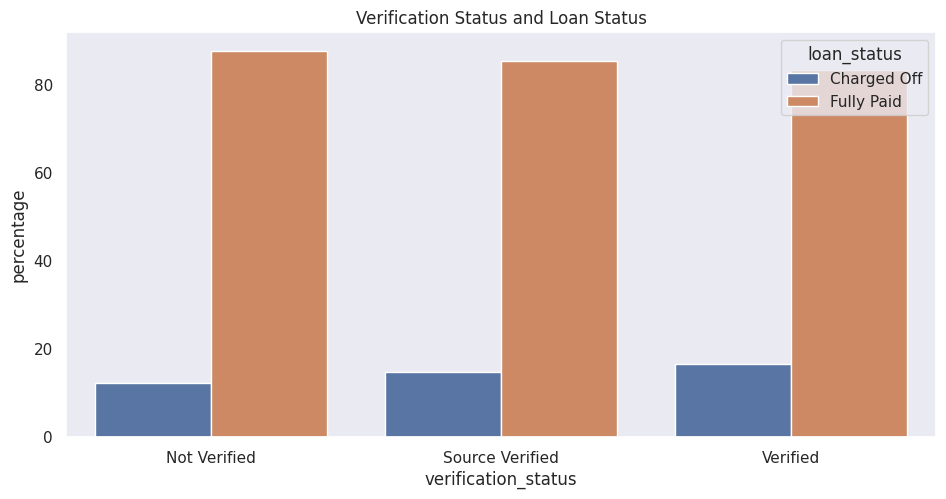

In [133]:
plt.figure(figsize=(10,5))
plt.title("Verification Status and Loan Status")
createSegmentedBarPlot('verification_status','percentage','loan_status',loan_bivariate_verification_data)

A borrower's verification status does not appear to be a strong predictor of loan default rates.

***

#### 7. investigating whether the intended use of a loan influences its likelihood of default

In [134]:
loan_bivariate_purpose_data = loan_data_df.groupby(['purpose','loan_status'],as_index=False)['id'].count()
loan_bivariate_purpose_data

purpose  loan_status     id
0                  car  Charged Off    151
1                  car   Fully Paid   1278
2          credit_card  Charged Off    501
3          credit_card   Fully Paid   4298
4   debt_consolidation  Charged Off   2623
5   debt_consolidation   Fully Paid  14750
6          educational  Charged Off     49
7          educational   Fully Paid    247
8     home_improvement  Charged Off    319
9     home_improvement   Fully Paid   2415
10               house  Charged Off     58
11               house   Fully Paid    291
12      major_purchase  Charged Off    206
13      major_purchase   Fully Paid   1849
14             medical  Charged Off     99
15             medical   Fully Paid    546
16              moving  Charged Off     81
17              moving   Fully Paid    460
18               other  Charged Off    578
19               other   Fully Paid   3017
20    renewable_energy  Charged Off     18
21    renewable_energy   Fully Paid     76
22      small_business  Charged Off    444
23      small_business   Fully Paid   1212
24            vacation  Charged Off     50
25            vacation   Fully Paid    291
26             wedding  Charged Off     89
27             wedding   Fully Paid    804

In [135]:
sum_loan_bivariate_purpose_data = loan_bivariate_purpose_data.groupby('purpose')['id'].transform('sum')
loan_bivariate_purpose_data['percentage'] = loan_bivariate_purpose_data['id'] / sum_loan_bivariate_purpose_data * 100
loan_bivariate_purpose_data

purpose  loan_status     id  percentage
0                  car  Charged Off    151   10.566830
1                  car   Fully Paid   1278   89.433170
2          credit_card  Charged Off    501   10.439675
3          credit_card   Fully Paid   4298   89.560325
4   debt_consolidation  Charged Off   2623   15.098141
5   debt_consolidation   Fully Paid  14750   84.901859
6          educational  Charged Off     49   16.554054
7          educational   Fully Paid    247   83.445946
8     home_improvement  Charged Off    319   11.667886
9     home_improvement   Fully Paid   2415   88.332114
10               house  Charged Off     58   16.618911
11               house   Fully Paid    291   83.381089
12      major_purchase  Charged Off    206   10.024331
13      major_purchase   Fully Paid   1849   89.975669
14             medical  Charged Off     99   15.348837
15             medical   Fully Paid    546   84.651163
16              moving  Charged Off     81   14.972274
17              moving   Fully Paid    460   85.027726
18               other  Charged Off    578   16.077886
19               other   Fully Paid   3017   83.922114
20    renewable_energy  Charged Off     18   19.148936
21    renewable_energy   Fully Paid     76   80.851064
22      small_business  Charged Off    444   26.811594
23      small_business   Fully Paid   1212   73.188406
24            vacation  Charged Off     50   14.662757
25            vacation   Fully Paid    291   85.337243
26             wedding  Charged Off     89    9.966405
27             wedding   Fully Paid    804   90.033595

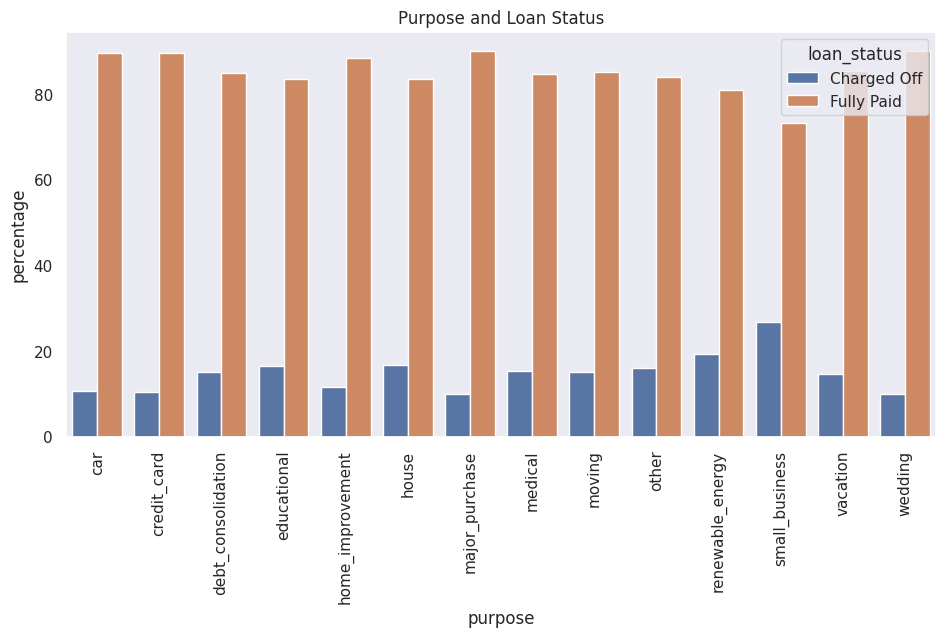

In [136]:
plt.figure(figsize=(10,5))
plt.title("Purpose and Loan Status")
plt.xticks(rotation=90)
createSegmentedBarPlot('purpose','percentage','loan_status',loan_bivariate_purpose_data)

Small business loans show a higher tendency for default compared to loans taken for other purposes.

***

#### 8. Checking if the loan amount also impacts the default rate with the purpose

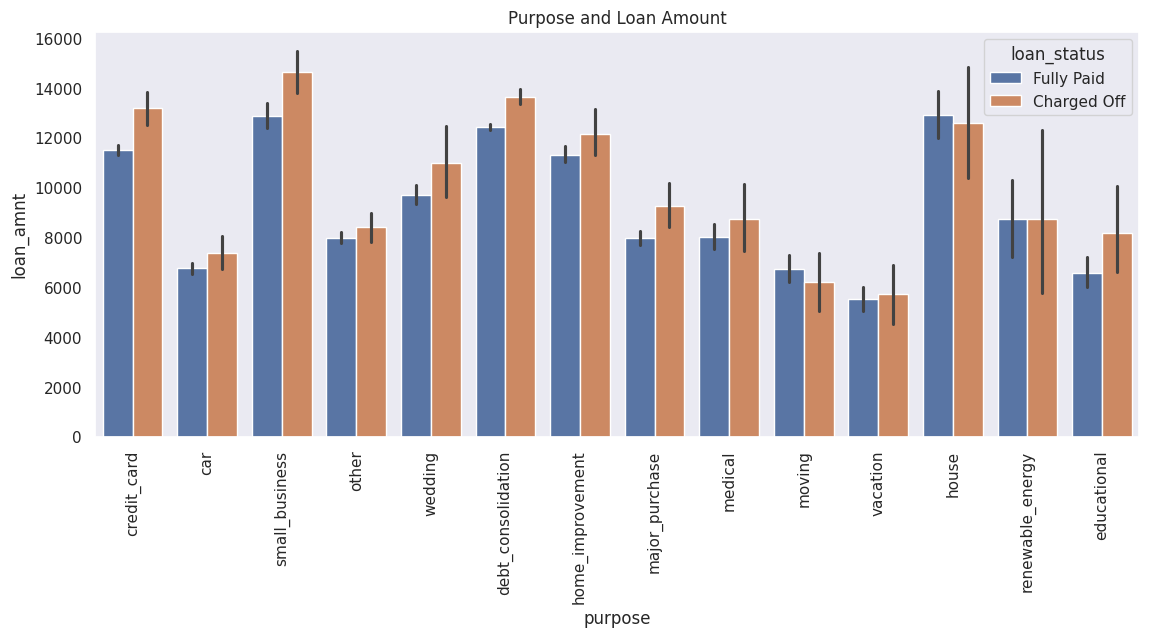

In [137]:
plt.figure(figsize=(12,5))
plt.title("Purpose and Loan Amount")
plt.xticks(rotation=90)
createSegmentedBarPlot('purpose','loan_amnt','loan_status',loan_data_df)

Borrowers with small businesses who defaulted on their loans have, on average, taken larger loan amounts compared to other borrower categories. This trend suggests a potentially higher risk profile for small business loans, highlighting the need for careful consideration in lending practices for this segment.

This further supports the observation that a combination of higher loan amounts and higher interest rates is associated with increased default rates.

***

#### 9. Reverifing our thought process by plotting loan amount and interest rates with the loan status.

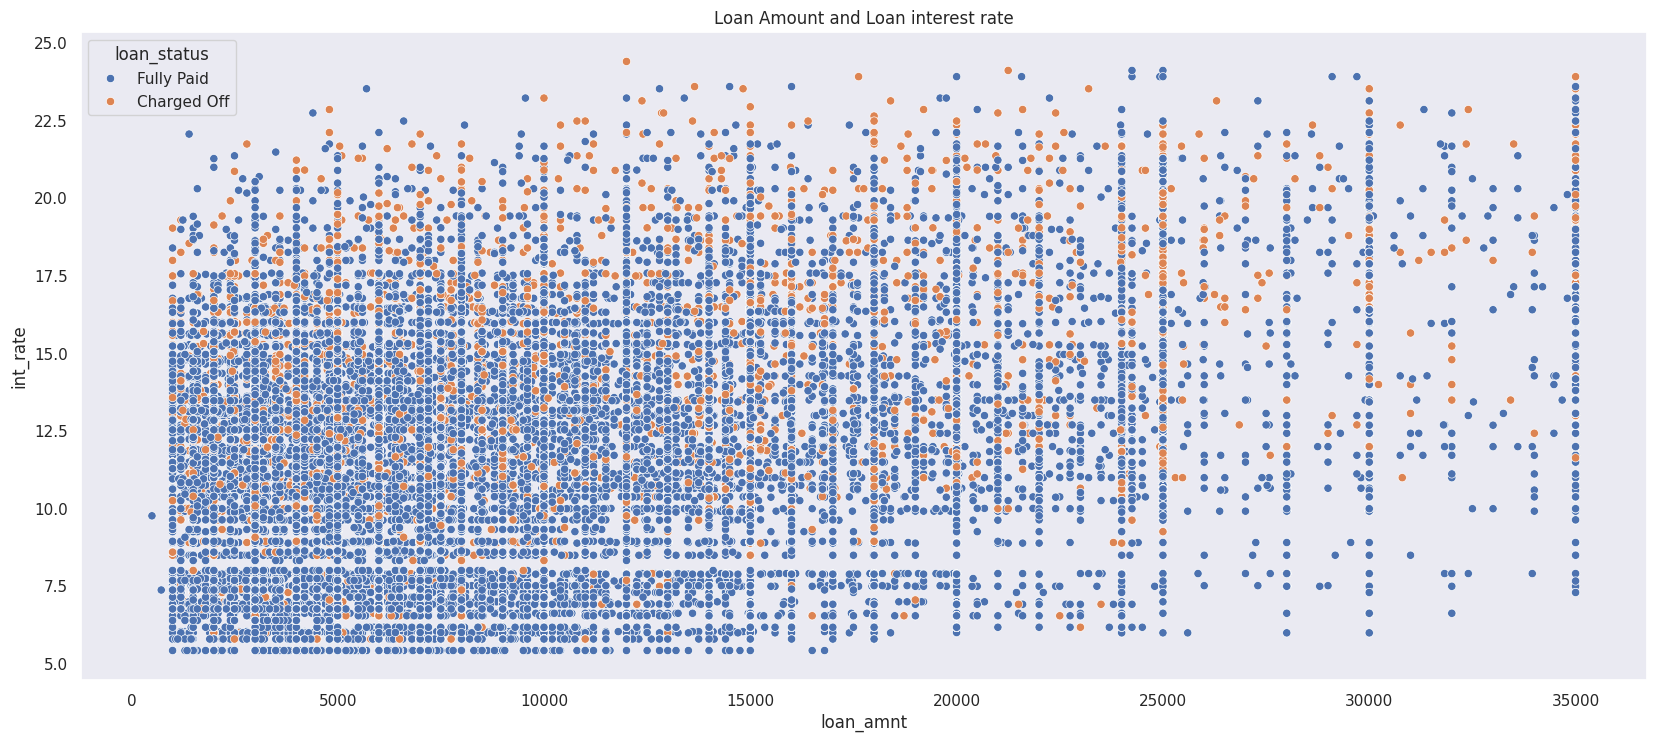

In [138]:
plt.figure(figsize=(18,8))
sns.scatterplot(x='loan_amnt', y='int_rate', data=loan_data_df, hue='loan_status')
plt.title('Loan Amount and Loan interest rate')
plt.show()

Analysis of the chart reveals a clear correlation between loan characteristics and default rates:
1. Loans with higher amounts and higher interest rates show a pronounced concentration of defaults. This suggests a critical threshold where financial burden becomes unsustainable for many borrowers.
2. While defaults do occur among loans with lower amounts and interest rates, they are notably less frequent. This indicates a generally more manageable repayment scenario for borrowers in this category.
3. The chart demonstrates a visible trend where default likelihood increases as both loan amount and interest rate rise, creating a diagonal pattern of increasing risk.

### Plotting a correlation matrix for Insights

In [139]:
loan_data_df.head()

id  loan_amnt  funded_amnt_inv       term  int_rate  installment  \
0  1077501       5000           4975.0  36 months     10.65       162.87   
1  1077430       2500           2500.0  60 months     15.27        59.83   
2  1077175       2400           2400.0  36 months     15.96        84.33   
3  1076863      10000          10000.0  36 months     13.49       339.31   
5  1075269       5000           5000.0  36 months      7.90       156.46   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B        B2  10+ years           RENT     24000.0            Verified   
1     C        C4   < 1 year           RENT     30000.0     Source Verified   
2     C        C5  10+ years           RENT     12252.0        Not Verified   
3     C        C1  10+ years           RENT     49200.0     Source Verified   
5     A        A4    3 years           RENT     36000.0     Source Verified   

     issue_d  loan_status         purpose addr_state    dti  delinq_2yrs  \
0 2011-12-01   Fully Paid     credit_card         AZ  27.65            0   
1 2011-12-01  Charged Off             car         GA   1.00            0   
2 2011-12-01   Fully Paid  small_business         IL   8.72            0   
3 2011-12-01   Fully Paid           other         CA  20.00            0   
5 2011-12-01   Fully Paid         wedding         AZ  11.20            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0       1985-01-01               1         3        0      13648        83.7   
1       1999-04-01               5         3        0       1687         9.4   
2       2001-11-01               2         2        0       2956        98.5   
3       1996-02-01               1        10        0       5598        21.0   
5       2004-11-01               3         9        0       7963        28.3   

   total_acc   total_pymnt  last_pymnt_amnt  pub_rec_bankruptcies  \
0          9   5863.155187           171.62                   0.0   
1          4   1008.710000           119.66                   0.0   
2         10   3005.666844           649.91                   0.0   
3         37  12231.890000           357.48                   0.0   
5         12   5632.210000           161.03                   0.0   

   issue_d_year  issue_d_month  issue_d_dayofweek  earliest_cr_year  \
0          2011             12                  3              1985   
1          2011             12                  3              1999   
2          2011             12                  3              2001   
3          2011             12                  3              1996   
5          2011             12                  3              2004   

   earliest_cr_month  earliest_cr_dayofweek  approved_loan_amnt_percentage  
0                  1                      1                           99.5  
1                  4                      3                          100.0  
2                 11                      3                          100.0  
3                  2                      3                          100.0  
5                 11                      0                          100.0

In [140]:
loan_data_df.dtypes

id                                        int64
loan_amnt                                 int64
funded_amnt_inv                         float64
term                                     object
int_rate                                float64
installment                             float64
grade                                    object
sub_grade                                object
emp_length                               object
home_ownership                           object
annual_inc                              float64
verification_status                      object
issue_d                          datetime64[ns]
loan_status                              object
purpose                                  object
addr_state                               object
dti                                     float64
delinq_2yrs                               int64
earliest_cr_line                 datetime64[ns]
inq_last_6mths                            int64
open_acc                                

In [141]:
numeric_columns = loan_data_df.select_dtypes(include=['number'])
correlation_data = numeric_columns.corr()

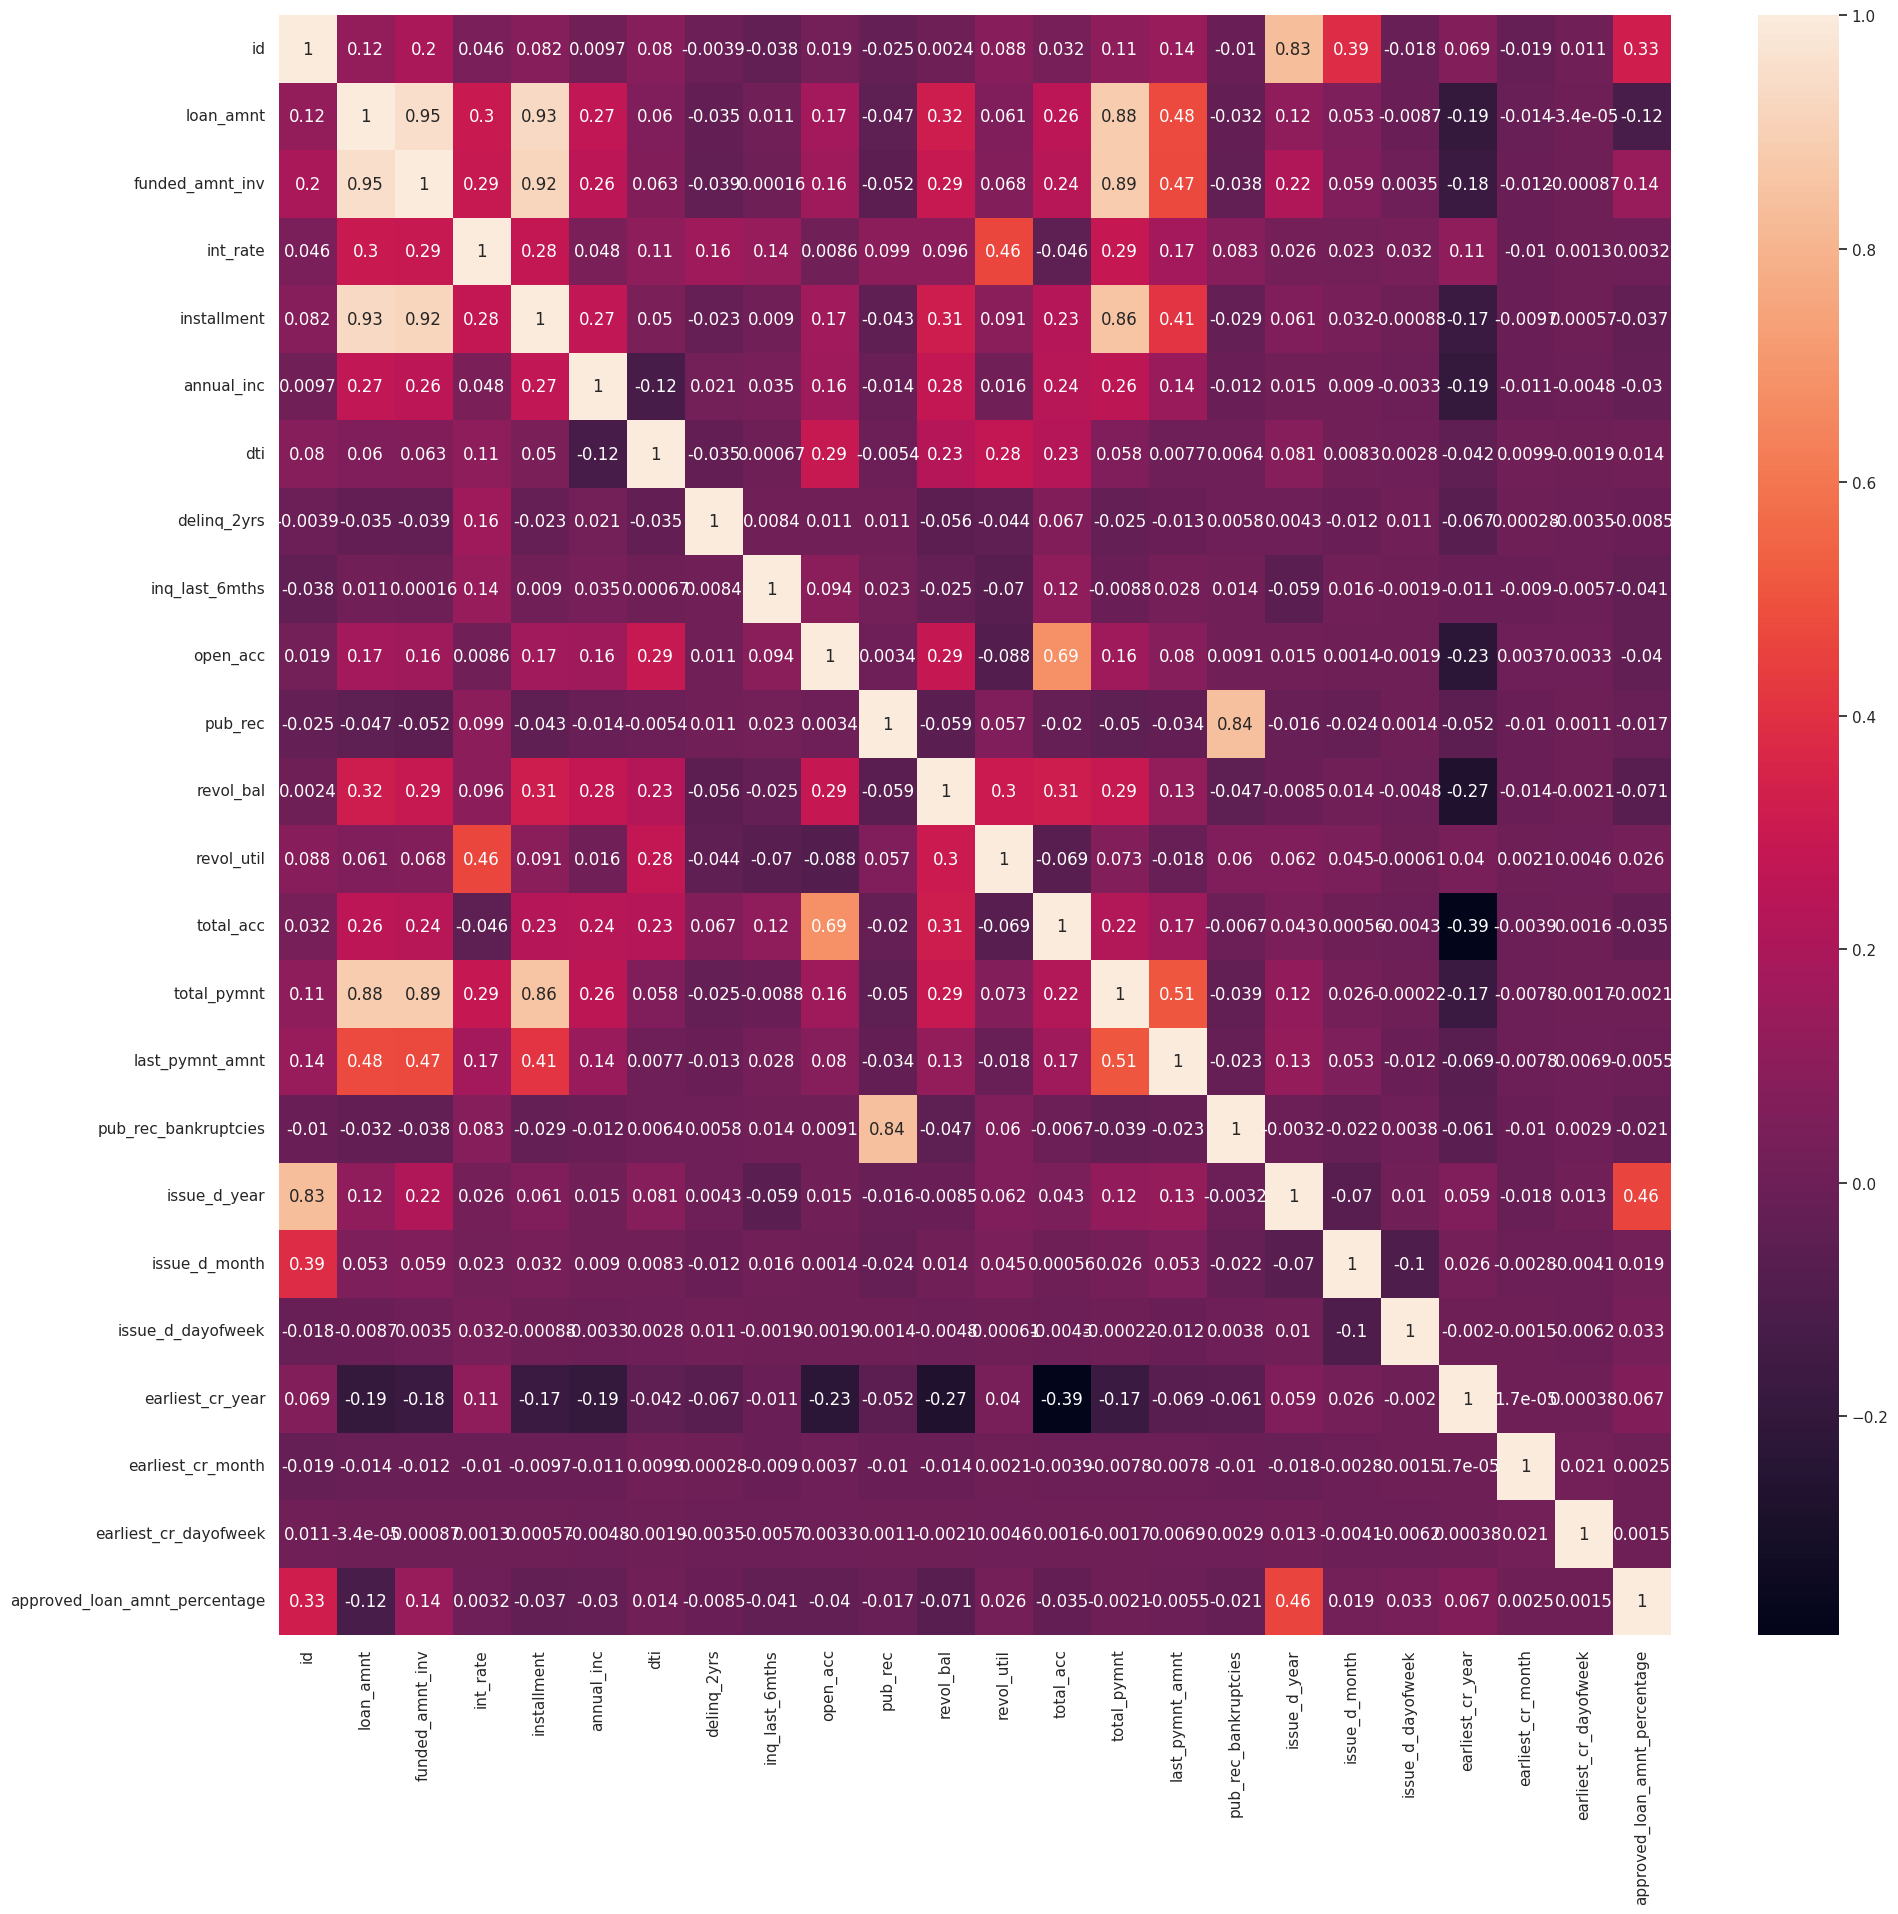

In [142]:
plt.figure(figsize=(20,20))
corr_matrix = sns.heatmap(correlation_data,annot=True)
plt.show()

- The strong positive correlation between public derogatory records and public bankruptcies indicates a significant overlap in these negative credit events, suggesting that borrowers with a history of one are more likely to have experienced the other, highlighting their combined impact on creditworthiness and risk assessment.

- A strong positive correlation of 0.84 indicates that borrowers with public derogatory records are likely to have declared bankruptcy.

## <font color=magenta> Conclusion </font>

Several key factors contribute to loan defaults, primarily stemming from a borrower's financial health and the specific terms of the loan:

**Financial Health:**

- **Lower Credit Grades:** Borrowers with lower grades (C-G), indicating a weaker credit history, face a higher risk of default.

- **Public Bankruptcy Records:** A history of bankruptcy significantly increases the likelihood of default, even in cases where borrowers have secured loans with lower interest rates.

- **Debt-to-Income Ratio (DTI):** A higher DTI, reflecting a higher debt burden relative to income, is associated with increased default risk.

- **Lower Annual Income:** Borrowers with lower incomes may struggle to meet repayment obligations, leading to a higher default risk.

**Loan Terms:**

- **Higher Interest Rates:** Loans with higher interest rates are more likely to default, potentially due to the increased financial strain on borrowers.

- **Larger Loan Amounts:** Larger loans can become unmanageable for borrowers, especially those with lower incomes or higher existing debt levels.

- **Longer Loan Terms (60 Months):** While seemingly offering lower monthly payments, longer-term loans may lead to complacency and a higher likelihood of missing payments over time.

**Other Factors:**
- **Loan Purpose:** Loans for small businesses carry a higher risk of default, possibly due to the inherent uncertainties and challenges of small business ventures.



The analysis underscores the need for Lending Club to maintain a comprehensive risk assessment model that considers not only traditional factors like credit grade and income but also the specific circumstances of each borrower, including their debt-to-income ratio, bankruptcy history, and loan purpose. By carefully evaluating these factors, Lending Club can make more informed lending decisions and mitigate the risk of defaults while still providing access to credit for those who need it.